# 1. Setup Mario

In [7]:
!pip install gym_super_mario_bros==7.3.0 nes_py

  Created wheel for nes-py: filename=nes_py-8.1.8-cp38-cp38-win_amd64.whl size=47363 sha256=fbf75a1f32bc07973927e7e33493309ff64bf0e2ddb4e1c65acc1699861c66e9
  Stored in directory: c:\users\joshua\appdata\local\pip\cache\wheels\8d\6e\f0\113c979eba40def28ee9b3c81a4adec00386106d81fb3bc2c2
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616828 sha256=9000ecc4a41b1d581c2533645f8aabaceb3caafb493e5df17219ce906614de4f
  Stored in directory: c:\users\joshua\appdata\local\pip\cache\wheels\27\6d\b3\a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built nes-py gym


In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [5]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

D:\Anaconda\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
D:\Anaconda\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

# 2. Preprocess Environment


In [13]:
# Install pytorch
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [15]:
# Install stable baselines for RL stuff
!pip install stable-baselines3[extra]

In [3]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [5]:
state = env.reset()

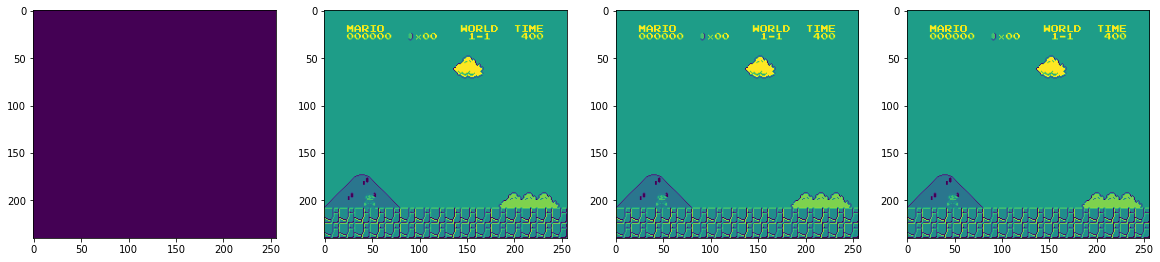

In [61]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])


# 3. Train the RL Model

In [6]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [7]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [8]:
CHECKPOINT_DIR = './trainCNN/'
LOG_DIR = './logs/'

In [9]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=50000, save_path=CHECKPOINT_DIR)

In [9]:
# This is the AI model started
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [15]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [10]:
# Load model
model = PPO.load('./trainCNN/CNNPart1/best_model_600000')

In [24]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=4000000, callback=callback)

AttributeError: 'NoneType' object has no attribute 'reset'

In [ ]:
model.save('thisisatestmodel')

# 4. Test it Out


In [21]:
# Load model
model = PPO.load('./trainCNN/CNNPart1/best_model_600000')

In [ ]:
#Continue training a pretrained model
model.set_env(env)
model.learn(total_timesteps=4000000, callback=callback)

Wrapping the env in a VecTransposeImage.
Logging to ./logs/PPO_6


D:\Anaconda\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 26  |
|    iterations      | 1   |
|    time_elapsed    | 19  |
|    total_timesteps | 512 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 2           |
|    time_elapsed         | 32          |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.001235212 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.927       |
|    learning_rate        | 1e-06       |
|    loss                 | 86.9        |
|    n_updates            | 11720       |
|    policy_gradient_loss | -0.000869   |
|    value_loss           | 174         |
-----------------------------------------
-----------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 51           |
|    iterations           | 13           |
|    time_elapsed         | 129          |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 0.0018184519 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | 0.0806       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0575       |
|    n_updates            | 11830        |
|    policy_gradient_loss | -0.00283     |
|    value_loss           | 0.126        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 51           |
|    iterations           | 14           |
|    time_elapsed         | 137          |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 54            |
|    iterations           | 24            |
|    time_elapsed         | 224           |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 0.00039828767 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.33         |
|    explained_variance   | -0.0285       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.152         |
|    n_updates            | 11940         |
|    policy_gradient_loss | -0.00082      |
|    value_loss           | 0.609         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 25            |
|    time_elapsed         | 232 

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 35            |
|    time_elapsed         | 318           |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 0.00012636522 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.37         |
|    explained_variance   | 0.108         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0737        |
|    n_updates            | 12050         |
|    policy_gradient_loss | 1.62e-05      |
|    value_loss           | 0.339         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 36           |
|    time_elapsed         | 327     

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 46            |
|    time_elapsed         | 411           |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 0.00011590007 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.42         |
|    explained_variance   | -0.159        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.147         |
|    n_updates            | 12160         |
|    policy_gradient_loss | 3.07e-05      |
|    value_loss           | 0.438         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 47            |
|    time_elapsed         | 419 

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 57           |
|    time_elapsed         | 502          |
|    total_timesteps      | 29184        |
| train/                  |              |
|    approx_kl            | 0.0014926349 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | -0.128       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.055        |
|    n_updates            | 12270        |
|    policy_gradient_loss | -0.00253     |
|    value_loss           | 0.123        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 58          |
|    time_elapsed         | 510         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 68           |
|    time_elapsed         | 593          |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 0.0001784761 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.48        |
|    explained_variance   | -0.482       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.136        |
|    n_updates            | 12380        |
|    policy_gradient_loss | -0.000469    |
|    value_loss           | 0.622        |
------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 58             |
|    iterations           | 69             |
|    time_elapsed         | 601            |
|

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 79            |
|    time_elapsed         | 684           |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 0.00032159104 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.33         |
|    explained_variance   | -0.0151       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.13          |
|    n_updates            | 12490         |
|    policy_gradient_loss | -0.000122     |
|    value_loss           | 1.9           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 80           |
|    time_elapsed         | 692     

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 90           |
|    time_elapsed         | 774          |
|    total_timesteps      | 46080        |
| train/                  |              |
|    approx_kl            | 0.0004612679 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.39        |
|    explained_variance   | 0.0167       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.053        |
|    n_updates            | 12600        |
|    policy_gradient_loss | -0.000965    |
|    value_loss           | 0.111        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 91           |
|    time_elapsed         | 782          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 101          |
|    time_elapsed         | 866          |
|    total_timesteps      | 51712        |
| train/                  |              |
|    approx_kl            | 0.0013096977 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | -0.303       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0994       |
|    n_updates            | 12710        |
|    policy_gradient_loss | -0.00258     |
|    value_loss           | 0.241        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 102           |
|    time_elapsed         | 874           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 112          |
|    time_elapsed         | 961          |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0002527011 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.3         |
|    explained_variance   | -0.144       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0458       |
|    n_updates            | 12820        |
|    policy_gradient_loss | -0.00038     |
|    value_loss           | 0.15         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 113           |
|    time_elapsed         | 970           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 123          |
|    time_elapsed         | 1056         |
|    total_timesteps      | 62976        |
| train/                  |              |
|    approx_kl            | 0.0013938732 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.06        |
|    explained_variance   | 0.924        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 12930        |
|    policy_gradient_loss | -0.00196     |
|    value_loss           | 290          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 124          |
|    time_elapsed         | 1065         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 134          |
|    time_elapsed         | 1152         |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 0.0027785117 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.32        |
|    explained_variance   | -0.149       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0475       |
|    n_updates            | 13040        |
|    policy_gradient_loss | -0.00424     |
|    value_loss           | 0.125        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 135          |
|    time_elapsed         | 1161         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 145          |
|    time_elapsed         | 1248         |
|    total_timesteps      | 74240        |
| train/                  |              |
|    approx_kl            | 0.0006284198 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.14        |
|    explained_variance   | -0.266       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0865       |
|    n_updates            | 13150        |
|    policy_gradient_loss | -0.00163     |
|    value_loss           | 0.196        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 146           |
|    time_elapsed         | 1258          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 156           |
|    time_elapsed         | 1348          |
|    total_timesteps      | 79872         |
| train/                  |               |
|    approx_kl            | 0.00071855704 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.21         |
|    explained_variance   | -0.0881       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.319         |
|    n_updates            | 13260         |
|    policy_gradient_loss | -0.00171      |
|    value_loss           | 0.832         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 157          |
|    time_elapsed         | 1357    

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 167          |
|    time_elapsed         | 1450         |
|    total_timesteps      | 85504        |
| train/                  |              |
|    approx_kl            | 0.0019868687 |
|    clip_fraction        | 0.00508      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.21        |
|    explained_variance   | -0.315       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0717       |
|    n_updates            | 13370        |
|    policy_gradient_loss | -0.00416     |
|    value_loss           | 0.141        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 168           |
|    time_elapsed         | 1459          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 178          |
|    time_elapsed         | 1547         |
|    total_timesteps      | 91136        |
| train/                  |              |
|    approx_kl            | 0.0020839716 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.19        |
|    explained_variance   | -0.0745      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0588       |
|    n_updates            | 13480        |
|    policy_gradient_loss | -0.00389     |
|    value_loss           | 0.123        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 179          |
|    time_elapsed         | 1556         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 189         |
|    time_elapsed         | 1652        |
|    total_timesteps      | 96768       |
| train/                  |             |
|    approx_kl            | 0.000673932 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | -0.44       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.125       |
|    n_updates            | 13590       |
|    policy_gradient_loss | -0.00117    |
|    value_loss           | 0.44        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 190           |
|    time_elapsed         | 1660          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 200           |
|    time_elapsed         | 1749          |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 0.00015570084 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.31         |
|    explained_variance   | -0.162        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0436        |
|    n_updates            | 13700         |
|    policy_gradient_loss | -0.000487     |
|    value_loss           | 0.15          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 201           |
|    time_elapsed         | 1757

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 211           |
|    time_elapsed         | 1845          |
|    total_timesteps      | 108032        |
| train/                  |               |
|    approx_kl            | 0.00036038086 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.29         |
|    explained_variance   | -0.141        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.137         |
|    n_updates            | 13810         |
|    policy_gradient_loss | -0.000489     |
|    value_loss           | 0.298         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 212           |
|    time_elapsed         | 1853

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 222          |
|    time_elapsed         | 1940         |
|    total_timesteps      | 113664       |
| train/                  |              |
|    approx_kl            | 0.0022100322 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.26        |
|    explained_variance   | -0.531       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0859       |
|    n_updates            | 13920        |
|    policy_gradient_loss | -0.00249     |
|    value_loss           | 0.188        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 223          |
|    time_elapsed         | 1949         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 233           |
|    time_elapsed         | 2037          |
|    total_timesteps      | 119296        |
| train/                  |               |
|    approx_kl            | 0.00084501156 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.05         |
|    explained_variance   | 0.947         |
|    learning_rate        | 1e-06         |
|    loss                 | 125           |
|    n_updates            | 14030         |
|    policy_gradient_loss | -0.000688     |
|    value_loss           | 323           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 234          |
|    time_elapsed         | 2045    

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 244           |
|    time_elapsed         | 2131          |
|    total_timesteps      | 124928        |
| train/                  |               |
|    approx_kl            | 0.00027884264 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.31         |
|    explained_variance   | -0.328        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0468        |
|    n_updates            | 14140         |
|    policy_gradient_loss | -0.000773     |
|    value_loss           | 0.137         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 245          |
|    time_elapsed         | 2139    

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 255           |
|    time_elapsed         | 2226          |
|    total_timesteps      | 130560        |
| train/                  |               |
|    approx_kl            | 0.00022933073 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.32         |
|    explained_variance   | -0.588        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.133         |
|    n_updates            | 14250         |
|    policy_gradient_loss | -0.000352     |
|    value_loss           | 0.25          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 256           |
|    time_elapsed         | 2235

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 266           |
|    time_elapsed         | 2322          |
|    total_timesteps      | 136192        |
| train/                  |               |
|    approx_kl            | 0.00026352727 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.31         |
|    explained_variance   | -0.203        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.121         |
|    n_updates            | 14360         |
|    policy_gradient_loss | -0.000258     |
|    value_loss           | 0.577         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 267          |
|    time_elapsed         | 2330    

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 277          |
|    time_elapsed         | 2416         |
|    total_timesteps      | 141824       |
| train/                  |              |
|    approx_kl            | 0.0019156695 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.188       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0619       |
|    n_updates            | 14470        |
|    policy_gradient_loss | -0.00298     |
|    value_loss           | 0.137        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 278         |
|    time_elapsed         | 2426        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 288          |
|    time_elapsed         | 2510         |
|    total_timesteps      | 147456       |
| train/                  |              |
|    approx_kl            | 0.0003143181 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | -0.246       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.113        |
|    n_updates            | 14580        |
|    policy_gradient_loss | -0.000743    |
|    value_loss           | 0.286        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 289           |
|    time_elapsed         | 2519          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 299          |
|    time_elapsed         | 2608         |
|    total_timesteps      | 153088       |
| train/                  |              |
|    approx_kl            | 0.0012403264 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.0821      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.125        |
|    n_updates            | 14690        |
|    policy_gradient_loss | -0.00164     |
|    value_loss           | 0.399        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 300          |
|    time_elapsed         | 2617         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 310           |
|    time_elapsed         | 2706          |
|    total_timesteps      | 158720        |
| train/                  |               |
|    approx_kl            | 0.00080483896 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.48         |
|    explained_variance   | -0.016        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.132         |
|    n_updates            | 14800         |
|    policy_gradient_loss | -0.000883     |
|    value_loss           | 0.58          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 311          |
|    time_elapsed         | 2715    

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 321          |
|    time_elapsed         | 2801         |
|    total_timesteps      | 164352       |
| train/                  |              |
|    approx_kl            | 0.0015441766 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.47        |
|    explained_variance   | -0.437       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0599       |
|    n_updates            | 14910        |
|    policy_gradient_loss | -0.00247     |
|    value_loss           | 0.163        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 322          |
|    time_elapsed         | 2809         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 332          |
|    time_elapsed         | 2894         |
|    total_timesteps      | 169984       |
| train/                  |              |
|    approx_kl            | 0.0010646418 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.48        |
|    explained_variance   | -0.142       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0929       |
|    n_updates            | 15020        |
|    policy_gradient_loss | -0.00179     |
|    value_loss           | 0.289        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 333           |
|    time_elapsed         | 2903          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 343           |
|    time_elapsed         | 2986          |
|    total_timesteps      | 175616        |
| train/                  |               |
|    approx_kl            | 0.00012024108 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | 0.986         |
|    learning_rate        | 1e-06         |
|    loss                 | 1.25          |
|    n_updates            | 15130         |
|    policy_gradient_loss | -0.00149      |
|    value_loss           | 15            |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 344           |
|    time_elapsed         | 2995

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 354          |
|    time_elapsed         | 3077         |
|    total_timesteps      | 181248       |
| train/                  |              |
|    approx_kl            | 0.0008728793 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.52        |
|    explained_variance   | -0.158       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0552       |
|    n_updates            | 15240        |
|    policy_gradient_loss | -0.00212     |
|    value_loss           | 0.134        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 355           |
|    time_elapsed         | 3085          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 365           |
|    time_elapsed         | 3168          |
|    total_timesteps      | 186880        |
| train/                  |               |
|    approx_kl            | 0.00049450446 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.47         |
|    explained_variance   | -0.118        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.516         |
|    n_updates            | 15350         |
|    policy_gradient_loss | -0.00102      |
|    value_loss           | 1.32          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 366           |
|    time_elapsed         | 3177

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 376          |
|    time_elapsed         | 3259         |
|    total_timesteps      | 192512       |
| train/                  |              |
|    approx_kl            | 0.0025416322 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.49        |
|    explained_variance   | -0.132       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0719       |
|    n_updates            | 15460        |
|    policy_gradient_loss | -0.00378     |
|    value_loss           | 0.125        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 377          |
|    time_elapsed         | 3268         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 387         |
|    time_elapsed         | 3350        |
|    total_timesteps      | 198144      |
| train/                  |             |
|    approx_kl            | 0.003898228 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | -0.0534     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0651      |
|    n_updates            | 15570       |
|    policy_gradient_loss | -0.00604    |
|    value_loss           | 0.143       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 388          |
|    time_elapsed         | 3358         |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 398           |
|    time_elapsed         | 3442          |
|    total_timesteps      | 203776        |
| train/                  |               |
|    approx_kl            | 0.00073831715 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.28         |
|    explained_variance   | -0.0336       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.213         |
|    n_updates            | 15680         |
|    policy_gradient_loss | -0.0014       |
|    value_loss           | 0.848         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 399          |
|    time_elapsed         | 3450    

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 409          |
|    time_elapsed         | 3532         |
|    total_timesteps      | 209408       |
| train/                  |              |
|    approx_kl            | 0.0038717126 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.25        |
|    explained_variance   | -0.503       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0516       |
|    n_updates            | 15790        |
|    policy_gradient_loss | -0.0034      |
|    value_loss           | 0.172        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 410           |
|    time_elapsed         | 3541          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 420          |
|    time_elapsed         | 3623         |
|    total_timesteps      | 215040       |
| train/                  |              |
|    approx_kl            | 3.029476e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.25        |
|    explained_variance   | -0.0292      |
|    learning_rate        | 1e-06        |
|    loss                 | 2.28         |
|    n_updates            | 15900        |
|    policy_gradient_loss | -2.62e-05    |
|    value_loss           | 2.8          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 421           |
|    time_elapsed         | 3632          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 431          |
|    time_elapsed         | 3714         |
|    total_timesteps      | 220672       |
| train/                  |              |
|    approx_kl            | 0.0018324903 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.22        |
|    explained_variance   | -0.21        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0627       |
|    n_updates            | 16010        |
|    policy_gradient_loss | -0.00246     |
|    value_loss           | 0.131        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 432          |
|    time_elapsed         | 3722         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 442           |
|    time_elapsed         | 3810          |
|    total_timesteps      | 226304        |
| train/                  |               |
|    approx_kl            | 0.00051550986 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.25         |
|    explained_variance   | -0.456        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0636        |
|    n_updates            | 16120         |
|    policy_gradient_loss | -0.000831     |
|    value_loss           | 0.149         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 443           |
|    time_elapsed         | 3819

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 453           |
|    time_elapsed         | 3904          |
|    total_timesteps      | 231936        |
| train/                  |               |
|    approx_kl            | 0.00033552316 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.2          |
|    explained_variance   | -0.34         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.427         |
|    n_updates            | 16230         |
|    policy_gradient_loss | 0.000216      |
|    value_loss           | 2.66          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 454         |
|    time_elapsed         | 3913        

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 464          |
|    time_elapsed         | 4000         |
|    total_timesteps      | 237568       |
| train/                  |              |
|    approx_kl            | 0.0018682712 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.173       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0383       |
|    n_updates            | 16340        |
|    policy_gradient_loss | -0.00186     |
|    value_loss           | 0.119        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 465           |
|    time_elapsed         | 4009          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 475          |
|    time_elapsed         | 4092         |
|    total_timesteps      | 243200       |
| train/                  |              |
|    approx_kl            | 0.0006521704 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.43        |
|    explained_variance   | -0.193       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0856       |
|    n_updates            | 16450        |
|    policy_gradient_loss | -0.00148     |
|    value_loss           | 0.151        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 476           |
|    time_elapsed         | 4100          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 486           |
|    time_elapsed         | 4183          |
|    total_timesteps      | 248832        |
| train/                  |               |
|    approx_kl            | 0.00012466172 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.34         |
|    explained_variance   | -0.269        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.21          |
|    n_updates            | 16560         |
|    policy_gradient_loss | -2.85e-05     |
|    value_loss           | 1.21          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 487           |
|    time_elapsed         | 4192

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 497           |
|    time_elapsed         | 4276          |
|    total_timesteps      | 254464        |
| train/                  |               |
|    approx_kl            | 0.00058947934 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.56         |
|    explained_variance   | -0.127        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0486        |
|    n_updates            | 16670         |
|    policy_gradient_loss | -0.00167      |
|    value_loss           | 0.13          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 498           |
|    time_elapsed         | 4284

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 508          |
|    time_elapsed         | 4367         |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 0.0008349817 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.51        |
|    explained_variance   | -0.06        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.118        |
|    n_updates            | 16780        |
|    policy_gradient_loss | -0.00139     |
|    value_loss           | 0.332        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 509           |
|    time_elapsed         | 4375          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 519          |
|    time_elapsed         | 4458         |
|    total_timesteps      | 265728       |
| train/                  |              |
|    approx_kl            | 0.0026870584 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.3         |
|    explained_variance   | 0.882        |
|    learning_rate        | 1e-06        |
|    loss                 | 106          |
|    n_updates            | 16890        |
|    policy_gradient_loss | -0.00327     |
|    value_loss           | 274          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 520          |
|    time_elapsed         | 4467         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 530         |
|    time_elapsed         | 4550        |
|    total_timesteps      | 271360      |
| train/                  |             |
|    approx_kl            | 0.004613265 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | -0.14       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0435      |
|    n_updates            | 17000       |
|    policy_gradient_loss | -0.00519    |
|    value_loss           | 0.154       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 531           |
|    time_elapsed         | 4558          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 541           |
|    time_elapsed         | 4641          |
|    total_timesteps      | 276992        |
| train/                  |               |
|    approx_kl            | 0.00045442337 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.26         |
|    explained_variance   | 0.0429        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0556        |
|    n_updates            | 17110         |
|    policy_gradient_loss | -0.00056      |
|    value_loss           | 0.659         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 542           |
|    time_elapsed         | 4649

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 552           |
|    time_elapsed         | 4732          |
|    total_timesteps      | 282624        |
| train/                  |               |
|    approx_kl            | 0.00021711888 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.27         |
|    explained_variance   | -0.092        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.157         |
|    n_updates            | 17220         |
|    policy_gradient_loss | -7.3e-05      |
|    value_loss           | 0.448         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 553          |
|    time_elapsed         | 4740    

-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 563         |
|    time_elapsed         | 4823        |
|    total_timesteps      | 288256      |
| train/                  |             |
|    approx_kl            | 0.001191836 |
|    clip_fraction        | 0.00273     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.98       |
|    explained_variance   | 0.942       |
|    learning_rate        | 1e-06       |
|    loss                 | 109         |
|    n_updates            | 17330       |
|    policy_gradient_loss | 0.00222     |
|    value_loss           | 270         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 564          |
|    time_elapsed         | 4832         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 574          |
|    time_elapsed         | 4915         |
|    total_timesteps      | 293888       |
| train/                  |              |
|    approx_kl            | 0.0026999933 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.27        |
|    explained_variance   | -0.0232      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.042        |
|    n_updates            | 17440        |
|    policy_gradient_loss | -0.00297     |
|    value_loss           | 0.107        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 575          |
|    time_elapsed         | 4923         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 585           |
|    time_elapsed         | 5006          |
|    total_timesteps      | 299520        |
| train/                  |               |
|    approx_kl            | 0.00029407965 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.2          |
|    explained_variance   | -0.772        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0938        |
|    n_updates            | 17550         |
|    policy_gradient_loss | -0.000383     |
|    value_loss           | 0.245         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 586           |
|    time_elapsed         | 5016

-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 596         |
|    time_elapsed         | 5098        |
|    total_timesteps      | 305152      |
| train/                  |             |
|    approx_kl            | 0.000398768 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | -0.222      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.161       |
|    n_updates            | 17660       |
|    policy_gradient_loss | -0.000565   |
|    value_loss           | 0.389       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 597           |
|    time_elapsed         | 5107          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 607           |
|    time_elapsed         | 5189          |
|    total_timesteps      | 310784        |
| train/                  |               |
|    approx_kl            | 0.00032011198 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.15         |
|    explained_variance   | -0.386        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0679        |
|    n_updates            | 17770         |
|    policy_gradient_loss | -0.00103      |
|    value_loss           | 0.147         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 608          |
|    time_elapsed         | 5197    

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 618           |
|    time_elapsed         | 5280          |
|    total_timesteps      | 316416        |
| train/                  |               |
|    approx_kl            | 0.00017810264 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.18         |
|    explained_variance   | -0.199        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0929        |
|    n_updates            | 17880         |
|    policy_gradient_loss | -0.000434     |
|    value_loss           | 0.165         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 619         |
|    time_elapsed         | 5289        

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 629          |
|    time_elapsed         | 5371         |
|    total_timesteps      | 322048       |
| train/                  |              |
|    approx_kl            | 0.0014569461 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.25        |
|    explained_variance   | 0.0109       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.159        |
|    n_updates            | 17990        |
|    policy_gradient_loss | -0.00277     |
|    value_loss           | 0.279        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 630          |
|    time_elapsed         | 5380         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 640           |
|    time_elapsed         | 5462          |
|    total_timesteps      | 327680        |
| train/                  |               |
|    approx_kl            | 0.00013876706 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.975        |
|    explained_variance   | 0.987         |
|    learning_rate        | 1e-06         |
|    loss                 | 19.1          |
|    n_updates            | 18100         |
|    policy_gradient_loss | -0.000802     |
|    value_loss           | 58.6          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 641          |
|    time_elapsed         | 5471    

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 651           |
|    time_elapsed         | 5554          |
|    total_timesteps      | 333312        |
| train/                  |               |
|    approx_kl            | 4.9155788e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.38         |
|    explained_variance   | -0.0992       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0461        |
|    n_updates            | 18210         |
|    policy_gradient_loss | 0.000138      |
|    value_loss           | 0.132         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 652          |
|    time_elapsed         | 5562    

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 662           |
|    time_elapsed         | 5645          |
|    total_timesteps      | 338944        |
| train/                  |               |
|    approx_kl            | 0.00049290725 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.44         |
|    explained_variance   | -0.127        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.145         |
|    n_updates            | 18320         |
|    policy_gradient_loss | -0.000545     |
|    value_loss           | 0.411         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 663          |
|    time_elapsed         | 5653    

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 673           |
|    time_elapsed         | 5736          |
|    total_timesteps      | 344576        |
| train/                  |               |
|    approx_kl            | 0.00045661384 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.44         |
|    explained_variance   | 0.922         |
|    learning_rate        | 1e-06         |
|    loss                 | 1.38          |
|    n_updates            | 18430         |
|    policy_gradient_loss | -0.000794     |
|    value_loss           | 25.6          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 674          |
|    time_elapsed         | 5744    

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 684          |
|    time_elapsed         | 5828         |
|    total_timesteps      | 350208       |
| train/                  |              |
|    approx_kl            | 0.0004630983 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.171       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0575       |
|    n_updates            | 18540        |
|    policy_gradient_loss | -0.000996    |
|    value_loss           | 0.125        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 685          |
|    time_elapsed         | 5837         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 695           |
|    time_elapsed         | 5920          |
|    total_timesteps      | 355840        |
| train/                  |               |
|    approx_kl            | 0.00010853144 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.33         |
|    explained_variance   | -0.0038       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.153         |
|    n_updates            | 18650         |
|    policy_gradient_loss | -0.000456     |
|    value_loss           | 0.309         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 696           |
|    time_elapsed         | 5928

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 706          |
|    time_elapsed         | 6011         |
|    total_timesteps      | 361472       |
| train/                  |              |
|    approx_kl            | 0.0019259092 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.31        |
|    explained_variance   | 0.674        |
|    learning_rate        | 1e-06        |
|    loss                 | 39.2         |
|    n_updates            | 18760        |
|    policy_gradient_loss | 0.00104      |
|    value_loss           | 104          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 707           |
|    time_elapsed         | 6019          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 717          |
|    time_elapsed         | 6102         |
|    total_timesteps      | 367104       |
| train/                  |              |
|    approx_kl            | 0.0005070475 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.29        |
|    explained_variance   | -0.137       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0426       |
|    n_updates            | 18870        |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 0.114        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 718          |
|    time_elapsed         | 6111         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 728           |
|    time_elapsed         | 6193          |
|    total_timesteps      | 372736        |
| train/                  |               |
|    approx_kl            | 0.00040729216 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.32         |
|    explained_variance   | -0.0544       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.152         |
|    n_updates            | 18980         |
|    policy_gradient_loss | -0.000515     |
|    value_loss           | 0.289         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 729          |
|    time_elapsed         | 6201    

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 739           |
|    time_elapsed         | 6284          |
|    total_timesteps      | 378368        |
| train/                  |               |
|    approx_kl            | 0.00015839445 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.42         |
|    explained_variance   | -0.44         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0877        |
|    n_updates            | 19090         |
|    policy_gradient_loss | -0.000192     |
|    value_loss           | 0.242         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 740           |
|    time_elapsed         | 6293

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 750          |
|    time_elapsed         | 6383         |
|    total_timesteps      | 384000       |
| train/                  |              |
|    approx_kl            | 0.0050211847 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.19        |
|    explained_variance   | 0.991        |
|    learning_rate        | 1e-06        |
|    loss                 | 21.2         |
|    n_updates            | 19200        |
|    policy_gradient_loss | -0.00945     |
|    value_loss           | 38.5         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 751           |
|    time_elapsed         | 6391          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 761          |
|    time_elapsed         | 6475         |
|    total_timesteps      | 389632       |
| train/                  |              |
|    approx_kl            | 0.0007685267 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | 0.12         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0699       |
|    n_updates            | 19310        |
|    policy_gradient_loss | -0.00126     |
|    value_loss           | 0.129        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 762          |
|    time_elapsed         | 6483         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 772           |
|    time_elapsed         | 6566          |
|    total_timesteps      | 395264        |
| train/                  |               |
|    approx_kl            | 0.00023530517 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.31         |
|    explained_variance   | 0.682         |
|    learning_rate        | 1e-06         |
|    loss                 | 50.7          |
|    n_updates            | 19420         |
|    policy_gradient_loss | -0.000774     |
|    value_loss           | 104           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 773          |
|    time_elapsed         | 6575    

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 783          |
|    time_elapsed         | 6659         |
|    total_timesteps      | 400896       |
| train/                  |              |
|    approx_kl            | 0.0017168695 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.11        |
|    explained_variance   | 0.988        |
|    learning_rate        | 1e-06        |
|    loss                 | 8.11         |
|    n_updates            | 19530        |
|    policy_gradient_loss | -0.00149     |
|    value_loss           | 30.9         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 784           |
|    time_elapsed         | 6668          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 794          |
|    time_elapsed         | 6751         |
|    total_timesteps      | 406528       |
| train/                  |              |
|    approx_kl            | 0.0018813934 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.25        |
|    explained_variance   | -0.234       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0874       |
|    n_updates            | 19640        |
|    policy_gradient_loss | -0.00165     |
|    value_loss           | 0.219        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 795           |
|    time_elapsed         | 6760          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 805           |
|    time_elapsed         | 6843          |
|    total_timesteps      | 412160        |
| train/                  |               |
|    approx_kl            | 0.00036438636 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.27         |
|    explained_variance   | 0.0456        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.102         |
|    n_updates            | 19750         |
|    policy_gradient_loss | -0.000232     |
|    value_loss           | 0.515         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 806           |
|    time_elapsed         | 6852

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 816          |
|    time_elapsed         | 6935         |
|    total_timesteps      | 417792       |
| train/                  |              |
|    approx_kl            | 0.0013643408 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | -0.0308      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0609       |
|    n_updates            | 19860        |
|    policy_gradient_loss | -0.00232     |
|    value_loss           | 0.125        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 817          |
|    time_elapsed         | 6944         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 827           |
|    time_elapsed         | 7028          |
|    total_timesteps      | 423424        |
| train/                  |               |
|    approx_kl            | 0.00040638132 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.2          |
|    explained_variance   | -0.322        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.104         |
|    n_updates            | 19970         |
|    policy_gradient_loss | -3.05e-05     |
|    value_loss           | 0.608         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 828          |
|    time_elapsed         | 7036    

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 838          |
|    time_elapsed         | 7120         |
|    total_timesteps      | 429056       |
| train/                  |              |
|    approx_kl            | 0.0010641878 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.545       |
|    explained_variance   | 0.838        |
|    learning_rate        | 1e-06        |
|    loss                 | 114          |
|    n_updates            | 20080        |
|    policy_gradient_loss | -0.000557    |
|    value_loss           | 213          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 839          |
|    time_elapsed         | 7128         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 849          |
|    time_elapsed         | 7212         |
|    total_timesteps      | 434688       |
| train/                  |              |
|    approx_kl            | 0.0007253998 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.27        |
|    explained_variance   | 0.695        |
|    learning_rate        | 1e-06        |
|    loss                 | 90.3         |
|    n_updates            | 20190        |
|    policy_gradient_loss | -0.00017     |
|    value_loss           | 220          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 850           |
|    time_elapsed         | 7220          |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 860         |
|    time_elapsed         | 7304        |
|    total_timesteps      | 440320      |
| train/                  |             |
|    approx_kl            | 0.000609335 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.277      |
|    explained_variance   | 0.814       |
|    learning_rate        | 1e-06       |
|    loss                 | 265         |
|    n_updates            | 20300       |
|    policy_gradient_loss | 0.000144    |
|    value_loss           | 342         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 861           |
|    time_elapsed         | 7313          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 871           |
|    time_elapsed         | 7397          |
|    total_timesteps      | 445952        |
| train/                  |               |
|    approx_kl            | 0.00027671363 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.331        |
|    explained_variance   | -0.261        |
|    learning_rate        | 1e-06         |
|    loss                 | 204           |
|    n_updates            | 20410         |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 545           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 872          |
|    time_elapsed         | 7405    

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 882           |
|    time_elapsed         | 7490          |
|    total_timesteps      | 451584        |
| train/                  |               |
|    approx_kl            | 0.00014801114 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.52         |
|    explained_variance   | 0.867         |
|    learning_rate        | 1e-06         |
|    loss                 | 63.7          |
|    n_updates            | 20520         |
|    policy_gradient_loss | 3.49e-05      |
|    value_loss           | 193           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 883           |
|    time_elapsed         | 7499

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 893          |
|    time_elapsed         | 7582         |
|    total_timesteps      | 457216       |
| train/                  |              |
|    approx_kl            | 4.481862e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.32        |
|    explained_variance   | 0.878        |
|    learning_rate        | 1e-06        |
|    loss                 | 121          |
|    n_updates            | 20630        |
|    policy_gradient_loss | -3.15e-05    |
|    value_loss           | 248          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 894           |
|    time_elapsed         | 7591          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 904           |
|    time_elapsed         | 7674          |
|    total_timesteps      | 462848        |
| train/                  |               |
|    approx_kl            | 8.0314465e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.228        |
|    explained_variance   | 0.918         |
|    learning_rate        | 1e-06         |
|    loss                 | 54.9          |
|    n_updates            | 20740         |
|    policy_gradient_loss | 0.00014       |
|    value_loss           | 88.6          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 905           |
|    time_elapsed         | 7683

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 915          |
|    time_elapsed         | 7769         |
|    total_timesteps      | 468480       |
| train/                  |              |
|    approx_kl            | 6.291014e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.158       |
|    explained_variance   | 0.618        |
|    learning_rate        | 1e-06        |
|    loss                 | 334          |
|    n_updates            | 20850        |
|    policy_gradient_loss | 9.01e-06     |
|    value_loss           | 636          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 916         |
|    time_elapsed         | 7777        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 926           |
|    time_elapsed         | 7861          |
|    total_timesteps      | 474112        |
| train/                  |               |
|    approx_kl            | 3.2922835e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.148        |
|    explained_variance   | 0.512         |
|    learning_rate        | 1e-06         |
|    loss                 | 451           |
|    n_updates            | 20960         |
|    policy_gradient_loss | 8.7e-05       |
|    value_loss           | 481           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 927          |
|    time_elapsed         | 7869    

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 937          |
|    time_elapsed         | 7953         |
|    total_timesteps      | 479744       |
| train/                  |              |
|    approx_kl            | 0.0008372208 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.336       |
|    explained_variance   | 0.936        |
|    learning_rate        | 1e-06        |
|    loss                 | 56.7         |
|    n_updates            | 21070        |
|    policy_gradient_loss | 0.000337     |
|    value_loss           | 119          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 938           |
|    time_elapsed         | 7961          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 948           |
|    time_elapsed         | 8045          |
|    total_timesteps      | 485376        |
| train/                  |               |
|    approx_kl            | 3.8383878e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.191        |
|    explained_variance   | 0.145         |
|    learning_rate        | 1e-06         |
|    loss                 | 683           |
|    n_updates            | 21180         |
|    policy_gradient_loss | -0.000228     |
|    value_loss           | 1.03e+03      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 949          |
|    time_elapsed         | 8053    

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 959          |
|    time_elapsed         | 8137         |
|    total_timesteps      | 491008       |
| train/                  |              |
|    approx_kl            | 0.0001861488 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.525       |
|    explained_variance   | 0.917        |
|    learning_rate        | 1e-06        |
|    loss                 | 76.6         |
|    n_updates            | 21290        |
|    policy_gradient_loss | 0.000204     |
|    value_loss           | 253          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 960           |
|    time_elapsed         | 8145          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 970           |
|    time_elapsed         | 8229          |
|    total_timesteps      | 496640        |
| train/                  |               |
|    approx_kl            | 0.00027784368 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.199        |
|    explained_variance   | 0.735         |
|    learning_rate        | 1e-06         |
|    loss                 | 168           |
|    n_updates            | 21400         |
|    policy_gradient_loss | -0.000704     |
|    value_loss           | 495           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 971          |
|    time_elapsed         | 8237    

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 981          |
|    time_elapsed         | 8322         |
|    total_timesteps      | 502272       |
| train/                  |              |
|    approx_kl            | 0.0007920234 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.357       |
|    explained_variance   | 0.713        |
|    learning_rate        | 1e-06        |
|    loss                 | 178          |
|    n_updates            | 21510        |
|    policy_gradient_loss | -0.000784    |
|    value_loss           | 722          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 982           |
|    time_elapsed         | 8330          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 992           |
|    time_elapsed         | 8422          |
|    total_timesteps      | 507904        |
| train/                  |               |
|    approx_kl            | 0.00045608263 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.423        |
|    explained_variance   | 0.82          |
|    learning_rate        | 1e-06         |
|    loss                 | 314           |
|    n_updates            | 21620         |
|    policy_gradient_loss | -0.000337     |
|    value_loss           | 675           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 993          |
|    time_elapsed         | 8431    

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1003         |
|    time_elapsed         | 8515         |
|    total_timesteps      | 513536       |
| train/                  |              |
|    approx_kl            | 0.0015208888 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.204       |
|    explained_variance   | 0.523        |
|    learning_rate        | 1e-06        |
|    loss                 | 141          |
|    n_updates            | 21730        |
|    policy_gradient_loss | -0.00418     |
|    value_loss           | 301          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 1004        |
|    time_elapsed         | 8523        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1014         |
|    time_elapsed         | 8605         |
|    total_timesteps      | 519168       |
| train/                  |              |
|    approx_kl            | 7.298181e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.165       |
|    explained_variance   | 0.56         |
|    learning_rate        | 1e-06        |
|    loss                 | 302          |
|    n_updates            | 21840        |
|    policy_gradient_loss | -0.000389    |
|    value_loss           | 671          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1015          |
|    time_elapsed         | 8613          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1025          |
|    time_elapsed         | 8696          |
|    total_timesteps      | 524800        |
| train/                  |               |
|    approx_kl            | 0.00056242687 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.296        |
|    explained_variance   | 0.668         |
|    learning_rate        | 1e-06         |
|    loss                 | 131           |
|    n_updates            | 21950         |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 297           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1026          |
|    time_elapsed         | 8704

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1036         |
|    time_elapsed         | 8786         |
|    total_timesteps      | 530432       |
| train/                  |              |
|    approx_kl            | 0.0012947448 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.302       |
|    explained_variance   | 0.757        |
|    learning_rate        | 1e-06        |
|    loss                 | 155          |
|    n_updates            | 22060        |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 266          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1037          |
|    time_elapsed         | 8795          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1047         |
|    time_elapsed         | 8877         |
|    total_timesteps      | 536064       |
| train/                  |              |
|    approx_kl            | 0.0004924693 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.176       |
|    explained_variance   | 0.356        |
|    learning_rate        | 1e-06        |
|    loss                 | 740          |
|    n_updates            | 22170        |
|    policy_gradient_loss | -0.000787    |
|    value_loss           | 831          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1048          |
|    time_elapsed         | 8885          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1058         |
|    time_elapsed         | 8967         |
|    total_timesteps      | 541696       |
| train/                  |              |
|    approx_kl            | 0.0004603729 |
|    clip_fraction        | 0.00781      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.186       |
|    explained_variance   | 0.335        |
|    learning_rate        | 1e-06        |
|    loss                 | 434          |
|    n_updates            | 22280        |
|    policy_gradient_loss | -0.000855    |
|    value_loss           | 1.01e+03     |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1059          |
|    time_elapsed         | 8976          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1069          |
|    time_elapsed         | 9058          |
|    total_timesteps      | 547328        |
| train/                  |               |
|    approx_kl            | 0.00030313653 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.461        |
|    explained_variance   | 0.59          |
|    learning_rate        | 1e-06         |
|    loss                 | 333           |
|    n_updates            | 22390         |
|    policy_gradient_loss | -0.000183     |
|    value_loss           | 798           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 1070        |
|    time_elapsed         | 9067        

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1080         |
|    time_elapsed         | 9150         |
|    total_timesteps      | 552960       |
| train/                  |              |
|    approx_kl            | 0.0025185295 |
|    clip_fraction        | 0.0209       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.537       |
|    explained_variance   | 0.803        |
|    learning_rate        | 1e-06        |
|    loss                 | 183          |
|    n_updates            | 22500        |
|    policy_gradient_loss | 0.00018      |
|    value_loss           | 460          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1081         |
|    time_elapsed         | 9159         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1091          |
|    time_elapsed         | 9241          |
|    total_timesteps      | 558592        |
| train/                  |               |
|    approx_kl            | 0.00012531562 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.327        |
|    explained_variance   | 0.372         |
|    learning_rate        | 1e-06         |
|    loss                 | 318           |
|    n_updates            | 22610         |
|    policy_gradient_loss | -0.000566     |
|    value_loss           | 680           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1092         |
|    time_elapsed         | 9250    

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1102         |
|    time_elapsed         | 9332         |
|    total_timesteps      | 564224       |
| train/                  |              |
|    approx_kl            | 0.0003605939 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.33        |
|    explained_variance   | 0.147        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.101        |
|    n_updates            | 22720        |
|    policy_gradient_loss | 0.000114     |
|    value_loss           | 1.3          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1103         |
|    time_elapsed         | 9340         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 1113       |
|    time_elapsed         | 9422       |
|    total_timesteps      | 569856     |
| train/                  |            |
|    approx_kl            | 0.00040993 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.38      |
|    explained_variance   | -0.00231   |
|    learning_rate        | 1e-06      |
|    loss                 | 0.181      |
|    n_updates            | 22830      |
|    policy_gradient_loss | -0.000344  |
|    value_loss           | 0.325      |
----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1114          |
|    time_elapsed         | 9430          |
|    total_timesteps      | 570368        

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1124         |
|    time_elapsed         | 9512         |
|    total_timesteps      | 575488       |
| train/                  |              |
|    approx_kl            | 0.0069829114 |
|    clip_fraction        | 0.049        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.06        |
|    explained_variance   | 0.912        |
|    learning_rate        | 1e-06        |
|    loss                 | 73.2         |
|    n_updates            | 22940        |
|    policy_gradient_loss | 0.000243     |
|    value_loss           | 263          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1125         |
|    time_elapsed         | 9520         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1135          |
|    time_elapsed         | 9602          |
|    total_timesteps      | 581120        |
| train/                  |               |
|    approx_kl            | 0.00035511318 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -0.269        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.112         |
|    n_updates            | 23050         |
|    policy_gradient_loss | -0.000204     |
|    value_loss           | 0.338         |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 60             |
|    iterations           | 1136           |
|    time_elapsed         | 

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1146         |
|    time_elapsed         | 9692         |
|    total_timesteps      | 586752       |
| train/                  |              |
|    approx_kl            | 0.0010812382 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.3         |
|    explained_variance   | -0.212       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.593        |
|    n_updates            | 23160        |
|    policy_gradient_loss | 0.00129      |
|    value_loss           | 4.19         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1147         |
|    time_elapsed         | 9701         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1157         |
|    time_elapsed         | 9783         |
|    total_timesteps      | 592384       |
| train/                  |              |
|    approx_kl            | 0.0003939314 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.51        |
|    explained_variance   | -0.615       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0949       |
|    n_updates            | 23270        |
|    policy_gradient_loss | -0.000802    |
|    value_loss           | 0.247        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1158         |
|    time_elapsed         | 9791         |
|    total_

--------------------------------------------
| time/                   |                |
|    fps                  | 60             |
|    iterations           | 1168           |
|    time_elapsed         | 9873           |
|    total_timesteps      | 598016         |
| train/                  |                |
|    approx_kl            | 0.000102204154 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.47          |
|    explained_variance   | -0.0923        |
|    learning_rate        | 1e-06          |
|    loss                 | 0.123          |
|    n_updates            | 23380          |
|    policy_gradient_loss | -3.67e-05      |
|    value_loss           | 0.239          |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1169         |
|    time_elapsed 

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1179         |
|    time_elapsed         | 9968         |
|    total_timesteps      | 603648       |
| train/                  |              |
|    approx_kl            | 0.0009884018 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.00755      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.247        |
|    n_updates            | 23490        |
|    policy_gradient_loss | -0.000932    |
|    value_loss           | 2.44         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1180          |
|    time_elapsed         | 9976          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1190         |
|    time_elapsed         | 10059        |
|    total_timesteps      | 609280       |
| train/                  |              |
|    approx_kl            | 0.0016930138 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.55        |
|    explained_variance   | -0.123       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0881       |
|    n_updates            | 23600        |
|    policy_gradient_loss | -0.00275     |
|    value_loss           | 0.225        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1191         |
|    time_elapsed         | 10067        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 1201        |
|    time_elapsed         | 10149       |
|    total_timesteps      | 614912      |
| train/                  |             |
|    approx_kl            | 0.000288537 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | -0.151      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.125       |
|    n_updates            | 23710       |
|    policy_gradient_loss | -0.00094    |
|    value_loss           | 0.305       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1202         |
|    time_elapsed         | 10158        |
|    total_timesteps      | 6

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1212         |
|    time_elapsed         | 10240        |
|    total_timesteps      | 620544       |
| train/                  |              |
|    approx_kl            | 0.0010317604 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance   | 0.876        |
|    learning_rate        | 1e-06        |
|    loss                 | 376          |
|    n_updates            | 23820        |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 676          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1213         |
|    time_elapsed         | 10248        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1223         |
|    time_elapsed         | 10340        |
|    total_timesteps      | 626176       |
| train/                  |              |
|    approx_kl            | 0.0010522536 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.5         |
|    explained_variance   | -0.473       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0776       |
|    n_updates            | 23930        |
|    policy_gradient_loss | -0.00194     |
|    value_loss           | 0.239        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1224         |
|    time_elapsed         | 10351        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 1234        |
|    time_elapsed         | 10454       |
|    total_timesteps      | 631808      |
| train/                  |             |
|    approx_kl            | 0.001165437 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | -0.0961     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.246       |
|    n_updates            | 24040       |
|    policy_gradient_loss | -0.000949   |
|    value_loss           | 1.16        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 1235          |
|    time_elapsed         | 10467         |
|    total_timesteps    

-----------------------------------------
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 1245        |
|    time_elapsed         | 10609       |
|    total_timesteps      | 637440      |
| train/                  |             |
|    approx_kl            | 0.000363359 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.44       |
|    explained_variance   | -0.368      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0746      |
|    n_updates            | 24150       |
|    policy_gradient_loss | -0.00038    |
|    value_loss           | 0.169       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 1246         |
|    time_elapsed         | 10623        |
|    total_timesteps      | 6

-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 1256          |
|    time_elapsed         | 10774         |
|    total_timesteps      | 643072        |
| train/                  |               |
|    approx_kl            | 0.00032829598 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.35         |
|    explained_variance   | 0.964         |
|    learning_rate        | 1e-06         |
|    loss                 | 66.8          |
|    n_updates            | 24260         |
|    policy_gradient_loss | -0.000581     |
|    value_loss           | 102           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 1257         |
|    time_elapsed         | 10789   

------------------------------------------
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 1267         |
|    time_elapsed         | 10935        |
|    total_timesteps      | 648704       |
| train/                  |              |
|    approx_kl            | 0.0009942723 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.48        |
|    explained_variance   | -0.0759      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0633       |
|    n_updates            | 24370        |
|    policy_gradient_loss | -0.00126     |
|    value_loss           | 0.104        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 1268          |
|    time_elapsed         | 10949         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 1278         |
|    time_elapsed         | 11098        |
|    total_timesteps      | 654336       |
| train/                  |              |
|    approx_kl            | 4.230684e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.43        |
|    explained_variance   | -0.0795      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.109        |
|    n_updates            | 24480        |
|    policy_gradient_loss | -4.65e-05    |
|    value_loss           | 0.498        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 1279         |
|    time_elapsed         | 11113        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 1289         |
|    time_elapsed         | 11255        |
|    total_timesteps      | 659968       |
| train/                  |              |
|    approx_kl            | 0.0003189901 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.29        |
|    explained_variance   | 0.92         |
|    learning_rate        | 1e-06        |
|    loss                 | 27           |
|    n_updates            | 24590        |
|    policy_gradient_loss | 4.1e-05      |
|    value_loss           | 221          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 1290          |
|    time_elapsed         | 11270         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 1300          |
|    time_elapsed         | 11414         |
|    total_timesteps      | 665600        |
| train/                  |               |
|    approx_kl            | 0.00091889803 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.36         |
|    explained_variance   | 0.0559        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0652        |
|    n_updates            | 24700         |
|    policy_gradient_loss | -0.00164      |
|    value_loss           | 0.222         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 1301        |
|    time_elapsed         | 11428       

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1311          |
|    time_elapsed         | 11573         |
|    total_timesteps      | 671232        |
| train/                  |               |
|    approx_kl            | 0.00053529034 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.39         |
|    explained_variance   | -0.534        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.083         |
|    n_updates            | 24810         |
|    policy_gradient_loss | -0.00137      |
|    value_loss           | 0.256         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1312         |
|    time_elapsed         | 11587   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1322         |
|    time_elapsed         | 11730        |
|    total_timesteps      | 676864       |
| train/                  |              |
|    approx_kl            | 0.0003303123 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.41        |
|    explained_variance   | -0.47        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0475       |
|    n_updates            | 24920        |
|    policy_gradient_loss | -0.000453    |
|    value_loss           | 0.159        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1323         |
|    time_elapsed         | 11745        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1333         |
|    time_elapsed         | 11891        |
|    total_timesteps      | 682496       |
| train/                  |              |
|    approx_kl            | 0.0007099103 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.33        |
|    explained_variance   | -0.265       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0582       |
|    n_updates            | 25030        |
|    policy_gradient_loss | -0.00148     |
|    value_loss           | 0.139        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1334         |
|    time_elapsed         | 11905        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1344         |
|    time_elapsed         | 12042        |
|    total_timesteps      | 688128       |
| train/                  |              |
|    approx_kl            | 8.677784e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.34        |
|    explained_variance   | -0.0224      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.102        |
|    n_updates            | 25140        |
|    policy_gradient_loss | 6.42e-05     |
|    value_loss           | 0.279        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1345         |
|    time_elapsed         | 12057        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1355          |
|    time_elapsed         | 12167         |
|    total_timesteps      | 693760        |
| train/                  |               |
|    approx_kl            | 0.00026885374 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.32         |
|    explained_variance   | -0.112        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.228         |
|    n_updates            | 25250         |
|    policy_gradient_loss | -0.000315     |
|    value_loss           | 2.51          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1356          |
|    time_elapsed         | 1217

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1366         |
|    time_elapsed         | 12282        |
|    total_timesteps      | 699392       |
| train/                  |              |
|    approx_kl            | 0.0012766971 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.43        |
|    explained_variance   | -0.172       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0516       |
|    n_updates            | 25360        |
|    policy_gradient_loss | -0.00177     |
|    value_loss           | 0.162        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1367          |
|    time_elapsed         | 12291         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1377         |
|    time_elapsed         | 12383        |
|    total_timesteps      | 705024       |
| train/                  |              |
|    approx_kl            | 0.0004115412 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.0641      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.102        |
|    n_updates            | 25470        |
|    policy_gradient_loss | -0.000206    |
|    value_loss           | 0.936        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1378          |
|    time_elapsed         | 12392         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1388         |
|    time_elapsed         | 12489        |
|    total_timesteps      | 710656       |
| train/                  |              |
|    approx_kl            | 0.0028152326 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.32        |
|    explained_variance   | -0.192       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0572       |
|    n_updates            | 25580        |
|    policy_gradient_loss | -0.00452     |
|    value_loss           | 0.125        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1389         |
|    time_elapsed         | 12498        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1399          |
|    time_elapsed         | 12595         |
|    total_timesteps      | 716288        |
| train/                  |               |
|    approx_kl            | 0.00031907868 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.28         |
|    explained_variance   | -0.316        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0463        |
|    n_updates            | 25690         |
|    policy_gradient_loss | -0.000671     |
|    value_loss           | 0.129         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1400         |
|    time_elapsed         | 12605   

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1410          |
|    time_elapsed         | 12699         |
|    total_timesteps      | 721920        |
| train/                  |               |
|    approx_kl            | 0.00011979346 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.27         |
|    explained_variance   | 0.739         |
|    learning_rate        | 1e-06         |
|    loss                 | 74.2          |
|    n_updates            | 25800         |
|    policy_gradient_loss | 0.000404      |
|    value_loss           | 78            |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1411         |
|    time_elapsed         | 12709   

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1421          |
|    time_elapsed         | 12804         |
|    total_timesteps      | 727552        |
| train/                  |               |
|    approx_kl            | 0.00018595066 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.33         |
|    explained_variance   | -0.585        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0845        |
|    n_updates            | 25910         |
|    policy_gradient_loss | -0.000522     |
|    value_loss           | 0.175         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1422         |
|    time_elapsed         | 12814   

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1432          |
|    time_elapsed         | 12908         |
|    total_timesteps      | 733184        |
| train/                  |               |
|    approx_kl            | 0.00051320274 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.37         |
|    explained_variance   | -0.169        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.071         |
|    n_updates            | 26020         |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 0.148         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1433         |
|    time_elapsed         | 12917   

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1443         |
|    time_elapsed         | 13005        |
|    total_timesteps      | 738816       |
| train/                  |              |
|    approx_kl            | 0.0020294972 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.32        |
|    explained_variance   | 0.183        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.175        |
|    n_updates            | 26130        |
|    policy_gradient_loss | -0.00254     |
|    value_loss           | 0.731        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1444         |
|    time_elapsed         | 13014        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1454          |
|    time_elapsed         | 13101         |
|    total_timesteps      | 744448        |
| train/                  |               |
|    approx_kl            | 0.00029029732 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.33         |
|    explained_variance   | -0.115        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0543        |
|    n_updates            | 26240         |
|    policy_gradient_loss | -0.000514     |
|    value_loss           | 0.122         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1455          |
|    time_elapsed         | 1311

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1465         |
|    time_elapsed         | 13195        |
|    total_timesteps      | 750080       |
| train/                  |              |
|    approx_kl            | 0.0019818065 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.239       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.071        |
|    n_updates            | 26350        |
|    policy_gradient_loss | -0.00277     |
|    value_loss           | 0.136        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1466         |
|    time_elapsed         | 13204        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1476          |
|    time_elapsed         | 13287         |
|    total_timesteps      | 755712        |
| train/                  |               |
|    approx_kl            | 0.00015630783 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.34         |
|    explained_variance   | -0.135        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.153         |
|    n_updates            | 26460         |
|    policy_gradient_loss | -0.000385     |
|    value_loss           | 0.456         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1477          |
|    time_elapsed         | 1329

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1487          |
|    time_elapsed         | 13379         |
|    total_timesteps      | 761344        |
| train/                  |               |
|    approx_kl            | 0.00082855497 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.16         |
|    explained_variance   | 0.983         |
|    learning_rate        | 1e-06         |
|    loss                 | 24.8          |
|    n_updates            | 26570         |
|    policy_gradient_loss | -0.000636     |
|    value_loss           | 46            |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1488          |
|    time_elapsed         | 1338

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1498          |
|    time_elapsed         | 13471         |
|    total_timesteps      | 766976        |
| train/                  |               |
|    approx_kl            | 0.00043048302 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.35         |
|    explained_variance   | -0.169        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0551        |
|    n_updates            | 26680         |
|    policy_gradient_loss | -0.000634     |
|    value_loss           | 0.124         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1499         |
|    time_elapsed         | 13479   

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1509         |
|    time_elapsed         | 13563        |
|    total_timesteps      | 772608       |
| train/                  |              |
|    approx_kl            | 0.0020498284 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | -0.164       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0576       |
|    n_updates            | 26790        |
|    policy_gradient_loss | -0.00248     |
|    value_loss           | 0.139        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 1510         |
|    time_elapsed         | 13571        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1520          |
|    time_elapsed         | 13655         |
|    total_timesteps      | 778240        |
| train/                  |               |
|    approx_kl            | 0.00014428282 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.33         |
|    explained_variance   | -0.648        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.074         |
|    n_updates            | 26900         |
|    policy_gradient_loss | -0.000429     |
|    value_loss           | 0.212         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 1521          |
|    time_elapsed         | 1366

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1531          |
|    time_elapsed         | 13746         |
|    total_timesteps      | 783872        |
| train/                  |               |
|    approx_kl            | 4.8512476e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.33         |
|    explained_variance   | -0.909        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0532        |
|    n_updates            | 27010         |
|    policy_gradient_loss | -9.1e-06      |
|    value_loss           | 0.211         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1532         |
|    time_elapsed         | 13754   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1542          |
|    time_elapsed         | 13838         |
|    total_timesteps      | 789504        |
| train/                  |               |
|    approx_kl            | 0.00090912834 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.23         |
|    explained_variance   | 0.186         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.584         |
|    n_updates            | 27120         |
|    policy_gradient_loss | -0.00153      |
|    value_loss           | 0.917         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1543         |
|    time_elapsed         | 13846   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1553         |
|    time_elapsed         | 13930        |
|    total_timesteps      | 795136       |
| train/                  |              |
|    approx_kl            | 0.0038653305 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.29        |
|    explained_variance   | -0.304       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0608       |
|    n_updates            | 27230        |
|    policy_gradient_loss | -0.0059      |
|    value_loss           | 0.146        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1554         |
|    time_elapsed         | 13938        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1564         |
|    time_elapsed         | 14026        |
|    total_timesteps      | 800768       |
| train/                  |              |
|    approx_kl            | 0.0003497852 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.27        |
|    explained_variance   | -0.129       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.064        |
|    n_updates            | 27340        |
|    policy_gradient_loss | -0.000943    |
|    value_loss           | 0.168        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1565        |
|    time_elapsed         | 14035       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1575         |
|    time_elapsed         | 14123        |
|    total_timesteps      | 806400       |
| train/                  |              |
|    approx_kl            | 0.0021723083 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.783       |
|    explained_variance   | 0.919        |
|    learning_rate        | 1e-06        |
|    loss                 | 203          |
|    n_updates            | 27450        |
|    policy_gradient_loss | 8.43e-06     |
|    value_loss           | 373          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1576         |
|    time_elapsed         | 14132        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1586        |
|    time_elapsed         | 14218       |
|    total_timesteps      | 812032      |
| train/                  |             |
|    approx_kl            | 0.005018695 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | -0.4        |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0406      |
|    n_updates            | 27560       |
|    policy_gradient_loss | -0.00551    |
|    value_loss           | 0.175       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1587        |
|    time_elapsed         | 14226       |
|    total_timesteps      | 812544

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1597          |
|    time_elapsed         | 14312         |
|    total_timesteps      | 817664        |
| train/                  |               |
|    approx_kl            | 0.00047376228 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.859        |
|    explained_variance   | 0.381         |
|    learning_rate        | 1e-06         |
|    loss                 | 20.5          |
|    n_updates            | 27670         |
|    policy_gradient_loss | 0.0013        |
|    value_loss           | 23.1          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1598         |
|    time_elapsed         | 14321   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1608          |
|    time_elapsed         | 14414         |
|    total_timesteps      | 823296        |
| train/                  |               |
|    approx_kl            | 0.00020279724 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.908        |
|    explained_variance   | -0.0209       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.431         |
|    n_updates            | 27780         |
|    policy_gradient_loss | 0.000424      |
|    value_loss           | 2.63          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1609         |
|    time_elapsed         | 14423   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1619         |
|    time_elapsed         | 14514        |
|    total_timesteps      | 828928       |
| train/                  |              |
|    approx_kl            | 0.0027673906 |
|    clip_fraction        | 0.00645      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.08        |
|    explained_variance   | -1.16        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.146        |
|    n_updates            | 27890        |
|    policy_gradient_loss | -0.00257     |
|    value_loss           | 0.267        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1620         |
|    time_elapsed         | 14523        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1630         |
|    time_elapsed         | 14613        |
|    total_timesteps      | 834560       |
| train/                  |              |
|    approx_kl            | 0.0011393335 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.15        |
|    explained_variance   | -0.683       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.194        |
|    n_updates            | 28000        |
|    policy_gradient_loss | -0.00163     |
|    value_loss           | 0.388        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1631         |
|    time_elapsed         | 14623        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1641         |
|    time_elapsed         | 14714        |
|    total_timesteps      | 840192       |
| train/                  |              |
|    approx_kl            | 0.0006280468 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.18        |
|    explained_variance   | -0.164       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0829       |
|    n_updates            | 28110        |
|    policy_gradient_loss | -0.000312    |
|    value_loss           | 0.289        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1642         |
|    time_elapsed         | 14723        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1652         |
|    time_elapsed         | 14812        |
|    total_timesteps      | 845824       |
| train/                  |              |
|    approx_kl            | 0.0009548991 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.887       |
|    explained_variance   | 0.97         |
|    learning_rate        | 1e-06        |
|    loss                 | 27.4         |
|    n_updates            | 28220        |
|    policy_gradient_loss | -0.0002      |
|    value_loss           | 80.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1653        |
|    time_elapsed         | 14821       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1663         |
|    time_elapsed         | 14912        |
|    total_timesteps      | 851456       |
| train/                  |              |
|    approx_kl            | 0.0002533946 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.21        |
|    explained_variance   | 0.087        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.05         |
|    n_updates            | 28330        |
|    policy_gradient_loss | -0.000351    |
|    value_loss           | 0.139        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1664         |
|    time_elapsed         | 14922        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1674          |
|    time_elapsed         | 15014         |
|    total_timesteps      | 857088        |
| train/                  |               |
|    approx_kl            | 0.00021096203 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.19         |
|    explained_variance   | -0.48         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0768        |
|    n_updates            | 28440         |
|    policy_gradient_loss | -0.000569     |
|    value_loss           | 0.141         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1675          |
|    time_elapsed         | 1502

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1685         |
|    time_elapsed         | 15115        |
|    total_timesteps      | 862720       |
| train/                  |              |
|    approx_kl            | 0.0021299801 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.713       |
|    explained_variance   | 0.925        |
|    learning_rate        | 1e-06        |
|    loss                 | 145          |
|    n_updates            | 28550        |
|    policy_gradient_loss | -0.00335     |
|    value_loss           | 327          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1686         |
|    time_elapsed         | 15124        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1696         |
|    time_elapsed         | 15215        |
|    total_timesteps      | 868352       |
| train/                  |              |
|    approx_kl            | 0.0014347344 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.286       |
|    explained_variance   | 0.696        |
|    learning_rate        | 1e-06        |
|    loss                 | 532          |
|    n_updates            | 28660        |
|    policy_gradient_loss | 0.00108      |
|    value_loss           | 1.09e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1697         |
|    time_elapsed         | 15224        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1707         |
|    time_elapsed         | 15315        |
|    total_timesteps      | 873984       |
| train/                  |              |
|    approx_kl            | 0.0009583328 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.21        |
|    explained_variance   | -0.762       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.11         |
|    n_updates            | 28770        |
|    policy_gradient_loss | -0.00206     |
|    value_loss           | 0.285        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1708         |
|    time_elapsed         | 15324        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1718          |
|    time_elapsed         | 15414         |
|    total_timesteps      | 879616        |
| train/                  |               |
|    approx_kl            | 0.00091147225 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.26         |
|    explained_variance   | -0.436        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0571        |
|    n_updates            | 28880         |
|    policy_gradient_loss | -0.00133      |
|    value_loss           | 0.235         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1719        |
|    time_elapsed         | 15423       

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1729         |
|    time_elapsed         | 15509        |
|    total_timesteps      | 885248       |
| train/                  |              |
|    approx_kl            | 6.799621e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.206       |
|    explained_variance   | 0.812        |
|    learning_rate        | 1e-06        |
|    loss                 | 148          |
|    n_updates            | 28990        |
|    policy_gradient_loss | -0.000152    |
|    value_loss           | 611          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1730         |
|    time_elapsed         | 15518        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1740          |
|    time_elapsed         | 15607         |
|    total_timesteps      | 890880        |
| train/                  |               |
|    approx_kl            | 0.00024421548 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.267        |
|    explained_variance   | 0.817         |
|    learning_rate        | 1e-06         |
|    loss                 | 81.5          |
|    n_updates            | 29100         |
|    policy_gradient_loss | 0.00177       |
|    value_loss           | 261           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1741          |
|    time_elapsed         | 1561

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1751          |
|    time_elapsed         | 15706         |
|    total_timesteps      | 896512        |
| train/                  |               |
|    approx_kl            | 0.00037059223 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.286        |
|    explained_variance   | -0.171        |
|    learning_rate        | 1e-06         |
|    loss                 | 564           |
|    n_updates            | 29210         |
|    policy_gradient_loss | -0.000211     |
|    value_loss           | 1.18e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1752          |
|    time_elapsed         | 1571

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1762          |
|    time_elapsed         | 15811         |
|    total_timesteps      | 902144        |
| train/                  |               |
|    approx_kl            | 0.00011233194 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.221        |
|    explained_variance   | 0.859         |
|    learning_rate        | 1e-06         |
|    loss                 | 104           |
|    n_updates            | 29320         |
|    policy_gradient_loss | -0.00102      |
|    value_loss           | 359           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1763         |
|    time_elapsed         | 15819   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1773         |
|    time_elapsed         | 15906        |
|    total_timesteps      | 907776       |
| train/                  |              |
|    approx_kl            | 8.685514e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.101       |
|    explained_variance   | 0.478        |
|    learning_rate        | 1e-06        |
|    loss                 | 608          |
|    n_updates            | 29430        |
|    policy_gradient_loss | -6.81e-05    |
|    value_loss           | 589          |
------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 57             |
|    iterations           | 1774           |
|    time_elapsed         | 15914          |
|

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1784          |
|    time_elapsed         | 16002         |
|    total_timesteps      | 913408        |
| train/                  |               |
|    approx_kl            | 0.00010335492 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.145        |
|    explained_variance   | 0.571         |
|    learning_rate        | 1e-06         |
|    loss                 | 369           |
|    n_updates            | 29540         |
|    policy_gradient_loss | 0.000518      |
|    value_loss           | 614           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1785         |
|    time_elapsed         | 16010   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1795         |
|    time_elapsed         | 16097        |
|    total_timesteps      | 919040       |
| train/                  |              |
|    approx_kl            | 2.844364e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.164       |
|    explained_variance   | 0.625        |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 29650        |
|    policy_gradient_loss | -0.000199    |
|    value_loss           | 424          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1796          |
|    time_elapsed         | 16105         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1806         |
|    time_elapsed         | 16189        |
|    total_timesteps      | 924672       |
| train/                  |              |
|    approx_kl            | 0.0006621324 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.314       |
|    explained_variance   | 0.83         |
|    learning_rate        | 1e-06        |
|    loss                 | 613          |
|    n_updates            | 29760        |
|    policy_gradient_loss | -0.00147     |
|    value_loss           | 698          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1807         |
|    time_elapsed         | 16197        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1817          |
|    time_elapsed         | 16280         |
|    total_timesteps      | 930304        |
| train/                  |               |
|    approx_kl            | 0.00025970524 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.612        |
|    explained_variance   | 0.892         |
|    learning_rate        | 1e-06         |
|    loss                 | 118           |
|    n_updates            | 29870         |
|    policy_gradient_loss | 0.000369      |
|    value_loss           | 302           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1818          |
|    time_elapsed         | 1628

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1828         |
|    time_elapsed         | 16372        |
|    total_timesteps      | 935936       |
| train/                  |              |
|    approx_kl            | 0.0005102077 |
|    clip_fraction        | 0.00547      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.279       |
|    explained_variance   | 0.332        |
|    learning_rate        | 1e-06        |
|    loss                 | 579          |
|    n_updates            | 29980        |
|    policy_gradient_loss | -9.03e-05    |
|    value_loss           | 1.08e+03     |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1829          |
|    time_elapsed         | 16381         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1839          |
|    time_elapsed         | 16464         |
|    total_timesteps      | 941568        |
| train/                  |               |
|    approx_kl            | 0.00013266515 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.465        |
|    explained_variance   | 0.703         |
|    learning_rate        | 1e-06         |
|    loss                 | 436           |
|    n_updates            | 30090         |
|    policy_gradient_loss | 0.00143       |
|    value_loss           | 937           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1840          |
|    time_elapsed         | 1647

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 1850      |
|    time_elapsed         | 16556     |
|    total_timesteps      | 947200    |
| train/                  |           |
|    approx_kl            | 0.0029717 |
|    clip_fraction        | 0.0355    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.364    |
|    explained_variance   | 0.684     |
|    learning_rate        | 1e-06     |
|    loss                 | 151       |
|    n_updates            | 30200     |
|    policy_gradient_loss | -0.00354  |
|    value_loss           | 300       |
---------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1851         |
|    time_elapsed         | 16564        |
|    total_timesteps      | 947712       |
| train/              

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1861        |
|    time_elapsed         | 16650       |
|    total_timesteps      | 952832      |
| train/                  |             |
|    approx_kl            | 0.000534481 |
|    clip_fraction        | 0.000586    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.295      |
|    explained_variance   | 0.455       |
|    learning_rate        | 1e-06       |
|    loss                 | 597         |
|    n_updates            | 30310       |
|    policy_gradient_loss | -0.00106    |
|    value_loss           | 648         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1862         |
|    time_elapsed         | 16658        |
|    total_timesteps      | 9

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1872         |
|    time_elapsed         | 16742        |
|    total_timesteps      | 958464       |
| train/                  |              |
|    approx_kl            | 0.0007109727 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.743       |
|    explained_variance   | 0.78         |
|    learning_rate        | 1e-06        |
|    loss                 | 120          |
|    n_updates            | 30420        |
|    policy_gradient_loss | -0.00117     |
|    value_loss           | 249          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1873         |
|    time_elapsed         | 16750        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1883         |
|    time_elapsed         | 16834        |
|    total_timesteps      | 964096       |
| train/                  |              |
|    approx_kl            | 0.0013225945 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.485       |
|    explained_variance   | 0.834        |
|    learning_rate        | 1e-06        |
|    loss                 | 215          |
|    n_updates            | 30530        |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 388          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1884         |
|    time_elapsed         | 16842        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1894          |
|    time_elapsed         | 16925         |
|    total_timesteps      | 969728        |
| train/                  |               |
|    approx_kl            | 0.00020077836 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.284        |
|    explained_variance   | 0.53          |
|    learning_rate        | 1e-06         |
|    loss                 | 204           |
|    n_updates            | 30640         |
|    policy_gradient_loss | 0.000298      |
|    value_loss           | 763           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1895         |
|    time_elapsed         | 16934   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1905          |
|    time_elapsed         | 17017         |
|    total_timesteps      | 975360        |
| train/                  |               |
|    approx_kl            | 0.00014732115 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.346        |
|    explained_variance   | 0.532         |
|    learning_rate        | 1e-06         |
|    loss                 | 357           |
|    n_updates            | 30750         |
|    policy_gradient_loss | -0.000427     |
|    value_loss           | 1.06e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1906          |
|    time_elapsed         | 1702

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1916        |
|    time_elapsed         | 17109       |
|    total_timesteps      | 980992      |
| train/                  |             |
|    approx_kl            | 0.001521636 |
|    clip_fraction        | 0.0168      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.285      |
|    explained_variance   | 0.388       |
|    learning_rate        | 1e-06       |
|    loss                 | 328         |
|    n_updates            | 30860       |
|    policy_gradient_loss | -0.0013     |
|    value_loss           | 750         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1917          |
|    time_elapsed         | 17117         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1927          |
|    time_elapsed         | 17200         |
|    total_timesteps      | 986624        |
| train/                  |               |
|    approx_kl            | 9.8603196e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.435        |
|    explained_variance   | 0.781         |
|    learning_rate        | 1e-06         |
|    loss                 | 107           |
|    n_updates            | 30970         |
|    policy_gradient_loss | -0.000276     |
|    value_loss           | 240           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1928         |
|    time_elapsed         | 17209   

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1938        |
|    time_elapsed         | 17292       |
|    total_timesteps      | 992256      |
| train/                  |             |
|    approx_kl            | 0.000785857 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.874       |
|    learning_rate        | 1e-06       |
|    loss                 | 126         |
|    n_updates            | 31080       |
|    policy_gradient_loss | -0.000901   |
|    value_loss           | 268         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 1939        |
|    time_elapsed         | 17300       |
|    total_timesteps      | 992768

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1949         |
|    time_elapsed         | 17384        |
|    total_timesteps      | 997888       |
| train/                  |              |
|    approx_kl            | 6.158871e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.417       |
|    explained_variance   | 0.851        |
|    learning_rate        | 1e-06        |
|    loss                 | 201          |
|    n_updates            | 31190        |
|    policy_gradient_loss | 0.000105     |
|    value_loss           | 317          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1950          |
|    time_elapsed         | 17392         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1960          |
|    time_elapsed         | 17478         |
|    total_timesteps      | 1003520       |
| train/                  |               |
|    approx_kl            | 3.9290404e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.216        |
|    explained_variance   | 0.654         |
|    learning_rate        | 1e-06         |
|    loss                 | 57.4          |
|    n_updates            | 31300         |
|    policy_gradient_loss | -9.94e-05     |
|    value_loss           | 129           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1961         |
|    time_elapsed         | 17486   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1971          |
|    time_elapsed         | 17570         |
|    total_timesteps      | 1009152       |
| train/                  |               |
|    approx_kl            | 0.00018451805 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.345        |
|    explained_variance   | 0.78          |
|    learning_rate        | 1e-06         |
|    loss                 | 225           |
|    n_updates            | 31410         |
|    policy_gradient_loss | -0.000588     |
|    value_loss           | 394           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 1972         |
|    time_elapsed         | 17578   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1982          |
|    time_elapsed         | 17662         |
|    total_timesteps      | 1014784       |
| train/                  |               |
|    approx_kl            | 0.00013578148 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.297        |
|    explained_variance   | 0.584         |
|    learning_rate        | 1e-06         |
|    loss                 | 570           |
|    n_updates            | 31520         |
|    policy_gradient_loss | 0.000332      |
|    value_loss           | 912           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1983          |
|    time_elapsed         | 1767

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1993          |
|    time_elapsed         | 17753         |
|    total_timesteps      | 1020416       |
| train/                  |               |
|    approx_kl            | 0.00026465824 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.247        |
|    explained_variance   | 0.809         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.9          |
|    n_updates            | 31630         |
|    policy_gradient_loss | -0.00109      |
|    value_loss           | 429           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 1994          |
|    time_elapsed         | 1776

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2004          |
|    time_elapsed         | 17845         |
|    total_timesteps      | 1026048       |
| train/                  |               |
|    approx_kl            | 0.00039299217 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.398        |
|    explained_variance   | 0.787         |
|    learning_rate        | 1e-06         |
|    loss                 | 144           |
|    n_updates            | 31740         |
|    policy_gradient_loss | -0.000182     |
|    value_loss           | 352           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2005          |
|    time_elapsed         | 1785

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2015          |
|    time_elapsed         | 17937         |
|    total_timesteps      | 1031680       |
| train/                  |               |
|    approx_kl            | 0.00026007323 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.781        |
|    explained_variance   | 0.8           |
|    learning_rate        | 1e-06         |
|    loss                 | 238           |
|    n_updates            | 31850         |
|    policy_gradient_loss | 1.12e-05      |
|    value_loss           | 257           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2016          |
|    time_elapsed         | 1794

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2026          |
|    time_elapsed         | 18028         |
|    total_timesteps      | 1037312       |
| train/                  |               |
|    approx_kl            | 0.00063106045 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.73         |
|    explained_variance   | -0.116        |
|    learning_rate        | 1e-06         |
|    loss                 | 1.46          |
|    n_updates            | 31960         |
|    policy_gradient_loss | -0.000409     |
|    value_loss           | 2.76          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2027         |
|    time_elapsed         | 18037   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2037          |
|    time_elapsed         | 18120         |
|    total_timesteps      | 1042944       |
| train/                  |               |
|    approx_kl            | 0.00030741293 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.211        |
|    explained_variance   | 0.7           |
|    learning_rate        | 1e-06         |
|    loss                 | 250           |
|    n_updates            | 32070         |
|    policy_gradient_loss | -0.00198      |
|    value_loss           | 458           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2038         |
|    time_elapsed         | 18129   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2048          |
|    time_elapsed         | 18212         |
|    total_timesteps      | 1048576       |
| train/                  |               |
|    approx_kl            | 1.8050428e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.187        |
|    explained_variance   | 0.751         |
|    learning_rate        | 1e-06         |
|    loss                 | 121           |
|    n_updates            | 32180         |
|    policy_gradient_loss | 5.37e-05      |
|    value_loss           | 405           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2049          |
|    time_elapsed         | 1822

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2059         |
|    time_elapsed         | 18317        |
|    total_timesteps      | 1054208      |
| train/                  |              |
|    approx_kl            | 0.0005630065 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.271       |
|    explained_variance   | 0.764        |
|    learning_rate        | 1e-06        |
|    loss                 | 235          |
|    n_updates            | 32290        |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 658          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2060         |
|    time_elapsed         | 18326        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2070          |
|    time_elapsed         | 18423         |
|    total_timesteps      | 1059840       |
| train/                  |               |
|    approx_kl            | 1.2551784e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.278        |
|    explained_variance   | 0.898         |
|    learning_rate        | 1e-06         |
|    loss                 | 107           |
|    n_updates            | 32400         |
|    policy_gradient_loss | -7.24e-05     |
|    value_loss           | 223           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2071         |
|    time_elapsed         | 18433   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2081         |
|    time_elapsed         | 18528        |
|    total_timesteps      | 1065472      |
| train/                  |              |
|    approx_kl            | 0.0006345749 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.315       |
|    explained_variance   | 0.863        |
|    learning_rate        | 1e-06        |
|    loss                 | 115          |
|    n_updates            | 32510        |
|    policy_gradient_loss | -0.000962    |
|    value_loss           | 288          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2082         |
|    time_elapsed         | 18537        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2092         |
|    time_elapsed         | 18628        |
|    total_timesteps      | 1071104      |
| train/                  |              |
|    approx_kl            | 0.0006438105 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.728       |
|    explained_variance   | -0.213       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.714        |
|    n_updates            | 32620        |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 5.1          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2093         |
|    time_elapsed         | 18637        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2103         |
|    time_elapsed         | 18727        |
|    total_timesteps      | 1076736      |
| train/                  |              |
|    approx_kl            | 0.0004219775 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.307       |
|    explained_variance   | 0.919        |
|    learning_rate        | 1e-06        |
|    loss                 | 87.5         |
|    n_updates            | 32730        |
|    policy_gradient_loss | -0.000337    |
|    value_loss           | 190          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2104          |
|    time_elapsed         | 18737         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2114          |
|    time_elapsed         | 18827         |
|    total_timesteps      | 1082368       |
| train/                  |               |
|    approx_kl            | 0.00024849712 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.224        |
|    explained_variance   | 0.729         |
|    learning_rate        | 1e-06         |
|    loss                 | 196           |
|    n_updates            | 32840         |
|    policy_gradient_loss | -0.000814     |
|    value_loss           | 370           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2115         |
|    time_elapsed         | 18836   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2125          |
|    time_elapsed         | 18926         |
|    total_timesteps      | 1088000       |
| train/                  |               |
|    approx_kl            | 5.1282812e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.368        |
|    explained_variance   | 0.828         |
|    learning_rate        | 1e-06         |
|    loss                 | 140           |
|    n_updates            | 32950         |
|    policy_gradient_loss | 7.04e-05      |
|    value_loss           | 709           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2126          |
|    time_elapsed         | 1893

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2136          |
|    time_elapsed         | 19026         |
|    total_timesteps      | 1093632       |
| train/                  |               |
|    approx_kl            | 2.2893772e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.281        |
|    explained_variance   | 0.827         |
|    learning_rate        | 1e-06         |
|    loss                 | 152           |
|    n_updates            | 33060         |
|    policy_gradient_loss | 0.000204      |
|    value_loss           | 311           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2137          |
|    time_elapsed         | 1903

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2147          |
|    time_elapsed         | 19125         |
|    total_timesteps      | 1099264       |
| train/                  |               |
|    approx_kl            | 0.00012909644 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.328        |
|    explained_variance   | 0.3           |
|    learning_rate        | 1e-06         |
|    loss                 | 695           |
|    n_updates            | 33170         |
|    policy_gradient_loss | 0.00106       |
|    value_loss           | 1.13e+03      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2148         |
|    time_elapsed         | 19134   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2158         |
|    time_elapsed         | 19226        |
|    total_timesteps      | 1104896      |
| train/                  |              |
|    approx_kl            | 4.924659e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.316       |
|    explained_variance   | 0.87         |
|    learning_rate        | 1e-06        |
|    loss                 | 104          |
|    n_updates            | 33280        |
|    policy_gradient_loss | 0.000206     |
|    value_loss           | 298          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2159          |
|    time_elapsed         | 19235         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2169          |
|    time_elapsed         | 19325         |
|    total_timesteps      | 1110528       |
| train/                  |               |
|    approx_kl            | 0.00010715984 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.249        |
|    explained_variance   | 0.683         |
|    learning_rate        | 1e-06         |
|    loss                 | 209           |
|    n_updates            | 33390         |
|    policy_gradient_loss | 0.000338      |
|    value_loss           | 442           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2170         |
|    time_elapsed         | 19335   

--------------------------------------------
| time/                   |                |
|    fps                  | 57             |
|    iterations           | 2180           |
|    time_elapsed         | 19424          |
|    total_timesteps      | 1116160        |
| train/                  |                |
|    approx_kl            | 0.000117857824 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.237         |
|    explained_variance   | 0.807          |
|    learning_rate        | 1e-06          |
|    loss                 | 200            |
|    n_updates            | 33500          |
|    policy_gradient_loss | -9.17e-05      |
|    value_loss           | 296            |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2181         |
|    time_elapsed 

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2191          |
|    time_elapsed         | 19523         |
|    total_timesteps      | 1121792       |
| train/                  |               |
|    approx_kl            | 0.00027341407 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.206        |
|    explained_variance   | 0.732         |
|    learning_rate        | 1e-06         |
|    loss                 | 179           |
|    n_updates            | 33610         |
|    policy_gradient_loss | -0.000826     |
|    value_loss           | 403           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2192          |
|    time_elapsed         | 1953

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2202          |
|    time_elapsed         | 19622         |
|    total_timesteps      | 1127424       |
| train/                  |               |
|    approx_kl            | 2.6866677e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.11         |
|    explained_variance   | 0.694         |
|    learning_rate        | 1e-06         |
|    loss                 | 296           |
|    n_updates            | 33720         |
|    policy_gradient_loss | -0.000166     |
|    value_loss           | 555           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2203          |
|    time_elapsed         | 1963

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2213          |
|    time_elapsed         | 19722         |
|    total_timesteps      | 1133056       |
| train/                  |               |
|    approx_kl            | 5.8083446e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.199        |
|    explained_variance   | 0.841         |
|    learning_rate        | 1e-06         |
|    loss                 | 96.4          |
|    n_updates            | 33830         |
|    policy_gradient_loss | -0.000423     |
|    value_loss           | 244           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2214          |
|    time_elapsed         | 1973

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2224          |
|    time_elapsed         | 19822         |
|    total_timesteps      | 1138688       |
| train/                  |               |
|    approx_kl            | 0.00014548306 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.163        |
|    explained_variance   | 0.695         |
|    learning_rate        | 1e-06         |
|    loss                 | 294           |
|    n_updates            | 33940         |
|    policy_gradient_loss | -0.000274     |
|    value_loss           | 719           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 2225        |
|    time_elapsed         | 19831       

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2235         |
|    time_elapsed         | 19921        |
|    total_timesteps      | 1144320      |
| train/                  |              |
|    approx_kl            | 8.941942e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.253       |
|    explained_variance   | 0.935        |
|    learning_rate        | 1e-06        |
|    loss                 | 68.3         |
|    n_updates            | 34050        |
|    policy_gradient_loss | 9.97e-05     |
|    value_loss           | 157          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2236          |
|    time_elapsed         | 19930         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2246          |
|    time_elapsed         | 20021         |
|    total_timesteps      | 1149952       |
| train/                  |               |
|    approx_kl            | 0.00026955793 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.212        |
|    explained_variance   | 0.808         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.8          |
|    n_updates            | 34160         |
|    policy_gradient_loss | -8.3e-05      |
|    value_loss           | 257           |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 57             |
|    iterations           | 2247           |
|    time_elapsed         | 

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2257         |
|    time_elapsed         | 20123        |
|    total_timesteps      | 1155584      |
| train/                  |              |
|    approx_kl            | 7.634866e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.148       |
|    explained_variance   | 0.746        |
|    learning_rate        | 1e-06        |
|    loss                 | 284          |
|    n_updates            | 34270        |
|    policy_gradient_loss | -1.97e-05    |
|    value_loss           | 418          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2258         |
|    time_elapsed         | 20132        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2268         |
|    time_elapsed         | 20222        |
|    total_timesteps      | 1161216      |
| train/                  |              |
|    approx_kl            | 0.0009873378 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.963        |
|    learning_rate        | 1e-06        |
|    loss                 | 46.4         |
|    n_updates            | 34380        |
|    policy_gradient_loss | -0.00201     |
|    value_loss           | 121          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2269         |
|    time_elapsed         | 20231        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2279         |
|    time_elapsed         | 20321        |
|    total_timesteps      | 1166848      |
| train/                  |              |
|    approx_kl            | 0.0015982937 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.286       |
|    explained_variance   | 0.817        |
|    learning_rate        | 1e-06        |
|    loss                 | 525          |
|    n_updates            | 34490        |
|    policy_gradient_loss | -0.00219     |
|    value_loss           | 601          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2280          |
|    time_elapsed         | 20330         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2290         |
|    time_elapsed         | 20422        |
|    total_timesteps      | 1172480      |
| train/                  |              |
|    approx_kl            | 1.733168e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.178       |
|    explained_variance   | 0.584        |
|    learning_rate        | 1e-06        |
|    loss                 | 494          |
|    n_updates            | 34600        |
|    policy_gradient_loss | -3.06e-05    |
|    value_loss           | 879          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2291          |
|    time_elapsed         | 20431         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2301         |
|    time_elapsed         | 20521        |
|    total_timesteps      | 1178112      |
| train/                  |              |
|    approx_kl            | 5.414104e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.222       |
|    explained_variance   | 0.665        |
|    learning_rate        | 1e-06        |
|    loss                 | 105          |
|    n_updates            | 34710        |
|    policy_gradient_loss | -6.07e-05    |
|    value_loss           | 196          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2302          |
|    time_elapsed         | 20530         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2312          |
|    time_elapsed         | 20621         |
|    total_timesteps      | 1183744       |
| train/                  |               |
|    approx_kl            | 0.00033311604 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.296        |
|    explained_variance   | 0.484         |
|    learning_rate        | 1e-06         |
|    loss                 | 353           |
|    n_updates            | 34820         |
|    policy_gradient_loss | -0.000652     |
|    value_loss           | 1.09e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2313          |
|    time_elapsed         | 2063

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2323         |
|    time_elapsed         | 20720        |
|    total_timesteps      | 1189376      |
| train/                  |              |
|    approx_kl            | 6.276078e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.195       |
|    explained_variance   | 0.54         |
|    learning_rate        | 1e-06        |
|    loss                 | 669          |
|    n_updates            | 34930        |
|    policy_gradient_loss | -0.000117    |
|    value_loss           | 720          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2324          |
|    time_elapsed         | 20729         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2334          |
|    time_elapsed         | 20820         |
|    total_timesteps      | 1195008       |
| train/                  |               |
|    approx_kl            | 0.00036906346 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.177        |
|    explained_variance   | 0.807         |
|    learning_rate        | 1e-06         |
|    loss                 | 164           |
|    n_updates            | 35040         |
|    policy_gradient_loss | -0.00147      |
|    value_loss           | 448           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2335          |
|    time_elapsed         | 2082

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 2345        |
|    time_elapsed         | 20927       |
|    total_timesteps      | 1200640     |
| train/                  |             |
|    approx_kl            | 0.000629124 |
|    clip_fraction        | 0.00293     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.174      |
|    explained_variance   | 0.437       |
|    learning_rate        | 1e-06       |
|    loss                 | 479         |
|    n_updates            | 35150       |
|    policy_gradient_loss | -0.00214    |
|    value_loss           | 850         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2346          |
|    time_elapsed         | 20937         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2356         |
|    time_elapsed         | 21056        |
|    total_timesteps      | 1206272      |
| train/                  |              |
|    approx_kl            | 0.0026371954 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.273       |
|    explained_variance   | 0.887        |
|    learning_rate        | 1e-06        |
|    loss                 | 72           |
|    n_updates            | 35260        |
|    policy_gradient_loss | -0.00155     |
|    value_loss           | 168          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2357          |
|    time_elapsed         | 21067         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2367          |
|    time_elapsed         | 21192         |
|    total_timesteps      | 1211904       |
| train/                  |               |
|    approx_kl            | 0.00018014293 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.149        |
|    explained_variance   | 0.544         |
|    learning_rate        | 1e-06         |
|    loss                 | 462           |
|    n_updates            | 35370         |
|    policy_gradient_loss | -0.000595     |
|    value_loss           | 761           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2368          |
|    time_elapsed         | 2120

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2378          |
|    time_elapsed         | 21309         |
|    total_timesteps      | 1217536       |
| train/                  |               |
|    approx_kl            | 0.00027753203 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.137        |
|    explained_variance   | 0.847         |
|    learning_rate        | 1e-06         |
|    loss                 | 130           |
|    n_updates            | 35480         |
|    policy_gradient_loss | -0.000573     |
|    value_loss           | 468           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2379          |
|    time_elapsed         | 2131

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2389          |
|    time_elapsed         | 21417         |
|    total_timesteps      | 1223168       |
| train/                  |               |
|    approx_kl            | 3.3030636e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.147        |
|    explained_variance   | 0.815         |
|    learning_rate        | 1e-06         |
|    loss                 | 260           |
|    n_updates            | 35590         |
|    policy_gradient_loss | 0.000133      |
|    value_loss           | 437           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2390          |
|    time_elapsed         | 2142

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2400         |
|    time_elapsed         | 21530        |
|    total_timesteps      | 1228800      |
| train/                  |              |
|    approx_kl            | 0.0012344096 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.191       |
|    explained_variance   | 0.595        |
|    learning_rate        | 1e-06        |
|    loss                 | 81.2         |
|    n_updates            | 35700        |
|    policy_gradient_loss | -0.00128     |
|    value_loss           | 211          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2401         |
|    time_elapsed         | 21540        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2411          |
|    time_elapsed         | 21639         |
|    total_timesteps      | 1234432       |
| train/                  |               |
|    approx_kl            | 0.00053680746 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.201        |
|    explained_variance   | 0.626         |
|    learning_rate        | 1e-06         |
|    loss                 | 268           |
|    n_updates            | 35810         |
|    policy_gradient_loss | -0.00107      |
|    value_loss           | 577           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2412          |
|    time_elapsed         | 2165

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2422         |
|    time_elapsed         | 21753        |
|    total_timesteps      | 1240064      |
| train/                  |              |
|    approx_kl            | 9.500387e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.336       |
|    explained_variance   | 0.742        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 35920        |
|    policy_gradient_loss | -0.000108    |
|    value_loss           | 264          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2423         |
|    time_elapsed         | 21763        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2433          |
|    time_elapsed         | 21863         |
|    total_timesteps      | 1245696       |
| train/                  |               |
|    approx_kl            | 0.00017593568 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.407        |
|    explained_variance   | 0.864         |
|    learning_rate        | 1e-06         |
|    loss                 | 151           |
|    n_updates            | 36030         |
|    policy_gradient_loss | -0.000603     |
|    value_loss           | 341           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2434          |
|    time_elapsed         | 2187

--------------------------------------------
| time/                   |                |
|    fps                  | 56             |
|    iterations           | 2444           |
|    time_elapsed         | 21978          |
|    total_timesteps      | 1251328        |
| train/                  |                |
|    approx_kl            | 1.25601655e-05 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.366         |
|    explained_variance   | 0.822          |
|    learning_rate        | 1e-06          |
|    loss                 | 209            |
|    n_updates            | 36140          |
|    policy_gradient_loss | 0.000149       |
|    value_loss           | 328            |
--------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2445          |
|    time_elap

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2455          |
|    time_elapsed         | 22095         |
|    total_timesteps      | 1256960       |
| train/                  |               |
|    approx_kl            | 3.7669553e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.209        |
|    explained_variance   | 0.866         |
|    learning_rate        | 1e-06         |
|    loss                 | 101           |
|    n_updates            | 36250         |
|    policy_gradient_loss | 2.38e-05      |
|    value_loss           | 163           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2456          |
|    time_elapsed         | 2210

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2466          |
|    time_elapsed         | 22206         |
|    total_timesteps      | 1262592       |
| train/                  |               |
|    approx_kl            | 0.00011610682 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.264        |
|    explained_variance   | 0.864         |
|    learning_rate        | 1e-06         |
|    loss                 | 183           |
|    n_updates            | 36360         |
|    policy_gradient_loss | -0.000258     |
|    value_loss           | 377           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2467         |
|    time_elapsed         | 22216   

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2477         |
|    time_elapsed         | 22319        |
|    total_timesteps      | 1268224      |
| train/                  |              |
|    approx_kl            | 0.0007273366 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.308       |
|    explained_variance   | 0.736        |
|    learning_rate        | 1e-06        |
|    loss                 | 203          |
|    n_updates            | 36470        |
|    policy_gradient_loss | -0.00115     |
|    value_loss           | 408          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2478         |
|    time_elapsed         | 22329        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2488         |
|    time_elapsed         | 22428        |
|    total_timesteps      | 1273856      |
| train/                  |              |
|    approx_kl            | 0.0011439631 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.37        |
|    explained_variance   | 0.906        |
|    learning_rate        | 1e-06        |
|    loss                 | 58.8         |
|    n_updates            | 36580        |
|    policy_gradient_loss | -0.000679    |
|    value_loss           | 167          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2489         |
|    time_elapsed         | 22437        |
|    total_

--------------------------------------------
| time/                   |                |
|    fps                  | 56             |
|    iterations           | 2499           |
|    time_elapsed         | 22540          |
|    total_timesteps      | 1279488        |
| train/                  |                |
|    approx_kl            | 0.000116759446 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.329         |
|    explained_variance   | 0.802          |
|    learning_rate        | 1e-06          |
|    loss                 | 265            |
|    n_updates            | 36690          |
|    policy_gradient_loss | -0.000305      |
|    value_loss           | 581            |
--------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2500          |
|    time_elap

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2510          |
|    time_elapsed         | 22648         |
|    total_timesteps      | 1285120       |
| train/                  |               |
|    approx_kl            | 3.9404025e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.291        |
|    explained_variance   | 0.856         |
|    learning_rate        | 1e-06         |
|    loss                 | 115           |
|    n_updates            | 36800         |
|    policy_gradient_loss | -0.000289     |
|    value_loss           | 613           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2511          |
|    time_elapsed         | 2265

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2521         |
|    time_elapsed         | 22751        |
|    total_timesteps      | 1290752      |
| train/                  |              |
|    approx_kl            | 4.831981e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.237       |
|    explained_variance   | 0.493        |
|    learning_rate        | 1e-06        |
|    loss                 | 227          |
|    n_updates            | 36910        |
|    policy_gradient_loss | -0.000189    |
|    value_loss           | 433          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2522          |
|    time_elapsed         | 22760         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2532          |
|    time_elapsed         | 22848         |
|    total_timesteps      | 1296384       |
| train/                  |               |
|    approx_kl            | 0.00043614698 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.193        |
|    explained_variance   | 0.497         |
|    learning_rate        | 1e-06         |
|    loss                 | 383           |
|    n_updates            | 37020         |
|    policy_gradient_loss | -0.000307     |
|    value_loss           | 786           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2533         |
|    time_elapsed         | 22858   

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2543         |
|    time_elapsed         | 22955        |
|    total_timesteps      | 1302016      |
| train/                  |              |
|    approx_kl            | 0.0006231974 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.188       |
|    explained_variance   | 0.869        |
|    learning_rate        | 1e-06        |
|    loss                 | 59.3         |
|    n_updates            | 37130        |
|    policy_gradient_loss | -0.000531    |
|    value_loss           | 179          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2544          |
|    time_elapsed         | 22965         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2554          |
|    time_elapsed         | 23068         |
|    total_timesteps      | 1307648       |
| train/                  |               |
|    approx_kl            | 0.00079810095 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.246        |
|    explained_variance   | 0.656         |
|    learning_rate        | 1e-06         |
|    loss                 | 92.7          |
|    n_updates            | 37240         |
|    policy_gradient_loss | -0.000316     |
|    value_loss           | 208           |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 56             |
|    iterations           | 2555           |
|    time_elapsed         | 

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2565          |
|    time_elapsed         | 23171         |
|    total_timesteps      | 1313280       |
| train/                  |               |
|    approx_kl            | 2.1205866e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.211        |
|    explained_variance   | 0.456         |
|    learning_rate        | 1e-06         |
|    loss                 | 218           |
|    n_updates            | 37350         |
|    policy_gradient_loss | -3.81e-05     |
|    value_loss           | 851           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2566          |
|    time_elapsed         | 2317

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2576          |
|    time_elapsed         | 23269         |
|    total_timesteps      | 1318912       |
| train/                  |               |
|    approx_kl            | 6.9024973e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.211        |
|    explained_variance   | 0.841         |
|    learning_rate        | 1e-06         |
|    loss                 | 208           |
|    n_updates            | 37460         |
|    policy_gradient_loss | -8.11e-06     |
|    value_loss           | 419           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2577          |
|    time_elapsed         | 2327

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2587          |
|    time_elapsed         | 23368         |
|    total_timesteps      | 1324544       |
| train/                  |               |
|    approx_kl            | 0.00047606206 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.191        |
|    explained_variance   | 0.392         |
|    learning_rate        | 1e-06         |
|    loss                 | 111           |
|    n_updates            | 37570         |
|    policy_gradient_loss | -0.000553     |
|    value_loss           | 713           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2588          |
|    time_elapsed         | 2337

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2598          |
|    time_elapsed         | 23464         |
|    total_timesteps      | 1330176       |
| train/                  |               |
|    approx_kl            | 0.00012676418 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.133        |
|    explained_variance   | 0.799         |
|    learning_rate        | 1e-06         |
|    loss                 | 209           |
|    n_updates            | 37680         |
|    policy_gradient_loss | -0.000294     |
|    value_loss           | 426           |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 56             |
|    iterations           | 2599           |
|    time_elapsed         | 

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2609          |
|    time_elapsed         | 23560         |
|    total_timesteps      | 1335808       |
| train/                  |               |
|    approx_kl            | 0.00044892135 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.191        |
|    explained_variance   | 0.922         |
|    learning_rate        | 1e-06         |
|    loss                 | 50.7          |
|    n_updates            | 37790         |
|    policy_gradient_loss | -0.000354     |
|    value_loss           | 154           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2610          |
|    time_elapsed         | 2356

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2620          |
|    time_elapsed         | 23657         |
|    total_timesteps      | 1341440       |
| train/                  |               |
|    approx_kl            | 3.5008416e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.156        |
|    explained_variance   | 0.8           |
|    learning_rate        | 1e-06         |
|    loss                 | 74.4          |
|    n_updates            | 37900         |
|    policy_gradient_loss | -0.000111     |
|    value_loss           | 207           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2621          |
|    time_elapsed         | 2366

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2631          |
|    time_elapsed         | 23751         |
|    total_timesteps      | 1347072       |
| train/                  |               |
|    approx_kl            | 0.00024596776 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.164        |
|    explained_variance   | 0.811         |
|    learning_rate        | 1e-06         |
|    loss                 | 98.5          |
|    n_updates            | 38010         |
|    policy_gradient_loss | -0.000459     |
|    value_loss           | 264           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2632         |
|    time_elapsed         | 23760   

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2642          |
|    time_elapsed         | 23846         |
|    total_timesteps      | 1352704       |
| train/                  |               |
|    approx_kl            | 0.00068707904 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.131        |
|    explained_variance   | 0.875         |
|    learning_rate        | 1e-06         |
|    loss                 | 216           |
|    n_updates            | 38120         |
|    policy_gradient_loss | -0.00136      |
|    value_loss           | 343           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2643         |
|    time_elapsed         | 23855   

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2653          |
|    time_elapsed         | 23937         |
|    total_timesteps      | 1358336       |
| train/                  |               |
|    approx_kl            | 0.00018886442 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.15         |
|    explained_variance   | 0.848         |
|    learning_rate        | 1e-06         |
|    loss                 | 183           |
|    n_updates            | 38230         |
|    policy_gradient_loss | -0.000299     |
|    value_loss           | 320           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2654          |
|    time_elapsed         | 2394

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2664         |
|    time_elapsed         | 24027        |
|    total_timesteps      | 1363968      |
| train/                  |              |
|    approx_kl            | 0.0004790416 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.114       |
|    explained_variance   | 0.877        |
|    learning_rate        | 1e-06        |
|    loss                 | 77.3         |
|    n_updates            | 38340        |
|    policy_gradient_loss | -0.00117     |
|    value_loss           | 173          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2665          |
|    time_elapsed         | 24036         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2675         |
|    time_elapsed         | 24118        |
|    total_timesteps      | 1369600      |
| train/                  |              |
|    approx_kl            | 7.919734e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.146       |
|    explained_variance   | 0.718        |
|    learning_rate        | 1e-06        |
|    loss                 | 203          |
|    n_updates            | 38450        |
|    policy_gradient_loss | -9.1e-05     |
|    value_loss           | 398          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2676          |
|    time_elapsed         | 24126         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2686          |
|    time_elapsed         | 24207         |
|    total_timesteps      | 1375232       |
| train/                  |               |
|    approx_kl            | 0.00081305427 |
|    clip_fraction        | 0.00391       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.215        |
|    explained_variance   | 0.666         |
|    learning_rate        | 1e-06         |
|    loss                 | 357           |
|    n_updates            | 38560         |
|    policy_gradient_loss | -0.00128      |
|    value_loss           | 697           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2687          |
|    time_elapsed         | 2421

-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 2697        |
|    time_elapsed         | 24298       |
|    total_timesteps      | 1380864     |
| train/                  |             |
|    approx_kl            | 9.28645e-06 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.156      |
|    explained_variance   | 0.796       |
|    learning_rate        | 1e-06       |
|    loss                 | 95.1        |
|    n_updates            | 38670       |
|    policy_gradient_loss | 4.56e-05    |
|    value_loss           | 275         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2698         |
|    time_elapsed         | 24306        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2708          |
|    time_elapsed         | 24387         |
|    total_timesteps      | 1386496       |
| train/                  |               |
|    approx_kl            | 0.00012966816 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.292        |
|    explained_variance   | 0.843         |
|    learning_rate        | 1e-06         |
|    loss                 | 90.6          |
|    n_updates            | 38780         |
|    policy_gradient_loss | -0.000276     |
|    value_loss           | 128           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2709         |
|    time_elapsed         | 24396   

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2719         |
|    time_elapsed         | 24477        |
|    total_timesteps      | 1392128      |
| train/                  |              |
|    approx_kl            | 0.0011127787 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.501       |
|    explained_variance   | 0.0139       |
|    learning_rate        | 1e-06        |
|    loss                 | 1.83         |
|    n_updates            | 38890        |
|    policy_gradient_loss | 0.000434     |
|    value_loss           | 38           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 2720        |
|    time_elapsed         | 24485       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2730         |
|    time_elapsed         | 24567        |
|    total_timesteps      | 1397760      |
| train/                  |              |
|    approx_kl            | 0.0010717476 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.266       |
|    explained_variance   | 0.875        |
|    learning_rate        | 1e-06        |
|    loss                 | 118          |
|    n_updates            | 39000        |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 191          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2731         |
|    time_elapsed         | 24575        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2741          |
|    time_elapsed         | 24659         |
|    total_timesteps      | 1403392       |
| train/                  |               |
|    approx_kl            | 0.00023922382 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.224        |
|    explained_variance   | 0.742         |
|    learning_rate        | 1e-06         |
|    loss                 | 256           |
|    n_updates            | 39110         |
|    policy_gradient_loss | -0.000735     |
|    value_loss           | 477           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2742         |
|    time_elapsed         | 24667   

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2752          |
|    time_elapsed         | 24749         |
|    total_timesteps      | 1409024       |
| train/                  |               |
|    approx_kl            | 1.2165983e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.208        |
|    explained_variance   | 0.77          |
|    learning_rate        | 1e-06         |
|    loss                 | 140           |
|    n_updates            | 39220         |
|    policy_gradient_loss | -7.72e-05     |
|    value_loss           | 281           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2753         |
|    time_elapsed         | 24757   

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 2763       |
|    time_elapsed         | 24839      |
|    total_timesteps      | 1414656    |
| train/                  |            |
|    approx_kl            | 0.00106333 |
|    clip_fraction        | 0.00469    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.234     |
|    explained_variance   | 0.647      |
|    learning_rate        | 1e-06      |
|    loss                 | 260        |
|    n_updates            | 39330      |
|    policy_gradient_loss | -0.00128   |
|    value_loss           | 623        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 2764         |
|    time_elapsed         | 24847        |
|    total_timesteps      | 1415168      |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2774          |
|    time_elapsed         | 24929         |
|    total_timesteps      | 1420288       |
| train/                  |               |
|    approx_kl            | 0.00030471617 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.254        |
|    explained_variance   | 0.791         |
|    learning_rate        | 1e-06         |
|    loss                 | 170           |
|    n_updates            | 39440         |
|    policy_gradient_loss | -0.000737     |
|    value_loss           | 395           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 2775        |
|    time_elapsed         | 24937       

-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 2785        |
|    time_elapsed         | 25018       |
|    total_timesteps      | 1425920     |
| train/                  |             |
|    approx_kl            | 0.000677068 |
|    clip_fraction        | 0.00293     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.212      |
|    explained_variance   | 0.689       |
|    learning_rate        | 1e-06       |
|    loss                 | 300         |
|    n_updates            | 39550       |
|    policy_gradient_loss | -8.43e-05   |
|    value_loss           | 759         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 2786          |
|    time_elapsed         | 25027         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2796         |
|    time_elapsed         | 25108        |
|    total_timesteps      | 1431552      |
| train/                  |              |
|    approx_kl            | 0.0007420485 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.194       |
|    explained_variance   | 0.725        |
|    learning_rate        | 1e-06        |
|    loss                 | 211          |
|    n_updates            | 39660        |
|    policy_gradient_loss | -0.00144     |
|    value_loss           | 559          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2797          |
|    time_elapsed         | 25116         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2807          |
|    time_elapsed         | 25198         |
|    total_timesteps      | 1437184       |
| train/                  |               |
|    approx_kl            | 4.1373656e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.224        |
|    explained_variance   | 0.769         |
|    learning_rate        | 1e-06         |
|    loss                 | 294           |
|    n_updates            | 39770         |
|    policy_gradient_loss | -0.000141     |
|    value_loss           | 370           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2808          |
|    time_elapsed         | 2520

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 2818        |
|    time_elapsed         | 25288       |
|    total_timesteps      | 1442816     |
| train/                  |             |
|    approx_kl            | 0.000299735 |
|    clip_fraction        | 0.000391    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.212      |
|    explained_variance   | 0.883       |
|    learning_rate        | 1e-06       |
|    loss                 | 68.2        |
|    n_updates            | 39880       |
|    policy_gradient_loss | -0.000106   |
|    value_loss           | 132         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2819          |
|    time_elapsed         | 25296         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2829         |
|    time_elapsed         | 25378        |
|    total_timesteps      | 1448448      |
| train/                  |              |
|    approx_kl            | 0.0015394252 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.363       |
|    explained_variance   | -0.126       |
|    learning_rate        | 1e-06        |
|    loss                 | 7.26         |
|    n_updates            | 39990        |
|    policy_gradient_loss | 0.000697     |
|    value_loss           | 62.1         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2830          |
|    time_elapsed         | 25386         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2840         |
|    time_elapsed         | 25469        |
|    total_timesteps      | 1454080      |
| train/                  |              |
|    approx_kl            | 0.0006096165 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.322       |
|    explained_variance   | 0.76         |
|    learning_rate        | 1e-06        |
|    loss                 | 233          |
|    n_updates            | 40100        |
|    policy_gradient_loss | -5.47e-05    |
|    value_loss           | 452          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2841         |
|    time_elapsed         | 25478        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2851         |
|    time_elapsed         | 25559        |
|    total_timesteps      | 1459712      |
| train/                  |              |
|    approx_kl            | 0.0006132355 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.357       |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-06        |
|    loss                 | 140          |
|    n_updates            | 40210        |
|    policy_gradient_loss | 0.00109      |
|    value_loss           | 228          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2852         |
|    time_elapsed         | 25567        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2862          |
|    time_elapsed         | 25649         |
|    total_timesteps      | 1465344       |
| train/                  |               |
|    approx_kl            | 0.00086224324 |
|    clip_fraction        | 0.00371       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.243        |
|    explained_variance   | 0.855         |
|    learning_rate        | 1e-06         |
|    loss                 | 102           |
|    n_updates            | 40320         |
|    policy_gradient_loss | -0.000856     |
|    value_loss           | 327           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2863          |
|    time_elapsed         | 2565

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2873         |
|    time_elapsed         | 25739        |
|    total_timesteps      | 1470976      |
| train/                  |              |
|    approx_kl            | 0.0022530046 |
|    clip_fraction        | 0.0217       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.301       |
|    explained_variance   | 0.917        |
|    learning_rate        | 1e-06        |
|    loss                 | 46           |
|    n_updates            | 40430        |
|    policy_gradient_loss | -0.00165     |
|    value_loss           | 128          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2874          |
|    time_elapsed         | 25747         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2884         |
|    time_elapsed         | 25828        |
|    total_timesteps      | 1476608      |
| train/                  |              |
|    approx_kl            | 3.463251e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.911        |
|    learning_rate        | 1e-06        |
|    loss                 | 98.8         |
|    n_updates            | 40540        |
|    policy_gradient_loss | 0.000964     |
|    value_loss           | 217          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2885          |
|    time_elapsed         | 25836         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 2895        |
|    time_elapsed         | 25918       |
|    total_timesteps      | 1482240     |
| train/                  |             |
|    approx_kl            | 0.001490684 |
|    clip_fraction        | 0.0176      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.272      |
|    explained_variance   | 0.942       |
|    learning_rate        | 1e-06       |
|    loss                 | 62.4        |
|    n_updates            | 40650       |
|    policy_gradient_loss | -0.00216    |
|    value_loss           | 124         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2896         |
|    time_elapsed         | 25926        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 2906        |
|    time_elapsed         | 26008       |
|    total_timesteps      | 1487872     |
| train/                  |             |
|    approx_kl            | 0.001584424 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.265      |
|    explained_variance   | 0.871       |
|    learning_rate        | 1e-06       |
|    loss                 | 76.3        |
|    n_updates            | 40760       |
|    policy_gradient_loss | -0.00189    |
|    value_loss           | 195         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2907         |
|    time_elapsed         | 26016        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2917          |
|    time_elapsed         | 26098         |
|    total_timesteps      | 1493504       |
| train/                  |               |
|    approx_kl            | 0.00018781354 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.194        |
|    explained_variance   | 0.773         |
|    learning_rate        | 1e-06         |
|    loss                 | 299           |
|    n_updates            | 40870         |
|    policy_gradient_loss | -0.000437     |
|    value_loss           | 698           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2918          |
|    time_elapsed         | 2610

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2928          |
|    time_elapsed         | 26188         |
|    total_timesteps      | 1499136       |
| train/                  |               |
|    approx_kl            | 0.00018409756 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.17         |
|    explained_variance   | 0.702         |
|    learning_rate        | 1e-06         |
|    loss                 | 340           |
|    n_updates            | 40980         |
|    policy_gradient_loss | -0.000358     |
|    value_loss           | 485           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2929          |
|    time_elapsed         | 2619

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2939          |
|    time_elapsed         | 26280         |
|    total_timesteps      | 1504768       |
| train/                  |               |
|    approx_kl            | 8.2657556e-05 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.232        |
|    explained_variance   | 0.647         |
|    learning_rate        | 1e-06         |
|    loss                 | 118           |
|    n_updates            | 41090         |
|    policy_gradient_loss | -0.000179     |
|    value_loss           | 298           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2940         |
|    time_elapsed         | 26288   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2950         |
|    time_elapsed         | 26370        |
|    total_timesteps      | 1510400      |
| train/                  |              |
|    approx_kl            | 0.0010571679 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.177       |
|    explained_variance   | 0.729        |
|    learning_rate        | 1e-06        |
|    loss                 | 74.2         |
|    n_updates            | 41200        |
|    policy_gradient_loss | -0.000591    |
|    value_loss           | 209          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2951          |
|    time_elapsed         | 26378         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2961          |
|    time_elapsed         | 26459         |
|    total_timesteps      | 1516032       |
| train/                  |               |
|    approx_kl            | 0.00077102554 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.316        |
|    explained_variance   | 0.677         |
|    learning_rate        | 1e-06         |
|    loss                 | 180           |
|    n_updates            | 41310         |
|    policy_gradient_loss | -0.000286     |
|    value_loss           | 370           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2962         |
|    time_elapsed         | 26467   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2972          |
|    time_elapsed         | 26549         |
|    total_timesteps      | 1521664       |
| train/                  |               |
|    approx_kl            | 6.7611225e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.428        |
|    explained_variance   | 0.738         |
|    learning_rate        | 1e-06         |
|    loss                 | 159           |
|    n_updates            | 41420         |
|    policy_gradient_loss | -7.29e-05     |
|    value_loss           | 566           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2973          |
|    time_elapsed         | 2655

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2983          |
|    time_elapsed         | 26639         |
|    total_timesteps      | 1527296       |
| train/                  |               |
|    approx_kl            | 0.00045285956 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.306        |
|    explained_variance   | 0.876         |
|    learning_rate        | 1e-06         |
|    loss                 | 117           |
|    n_updates            | 41530         |
|    policy_gradient_loss | -0.000611     |
|    value_loss           | 235           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2984          |
|    time_elapsed         | 2664

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 2994         |
|    time_elapsed         | 26728        |
|    total_timesteps      | 1532928      |
| train/                  |              |
|    approx_kl            | 9.234261e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.189       |
|    explained_variance   | 0.609        |
|    learning_rate        | 1e-06        |
|    loss                 | 651          |
|    n_updates            | 41640        |
|    policy_gradient_loss | -0.000295    |
|    value_loss           | 648          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2995          |
|    time_elapsed         | 26736         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3005          |
|    time_elapsed         | 26818         |
|    total_timesteps      | 1538560       |
| train/                  |               |
|    approx_kl            | 4.8504327e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.203        |
|    explained_variance   | 0.644         |
|    learning_rate        | 1e-06         |
|    loss                 | 380           |
|    n_updates            | 41750         |
|    policy_gradient_loss | 7.21e-05      |
|    value_loss           | 556           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3006          |
|    time_elapsed         | 2682

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 3016        |
|    time_elapsed         | 26907       |
|    total_timesteps      | 1544192     |
| train/                  |             |
|    approx_kl            | 0.002980756 |
|    clip_fraction        | 0.00527     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.394      |
|    explained_variance   | 0.681       |
|    learning_rate        | 1e-06       |
|    loss                 | 65.8        |
|    n_updates            | 41860       |
|    policy_gradient_loss | -0.00186    |
|    value_loss           | 187         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 3017        |
|    time_elapsed         | 26915       |
|    total_timesteps      | 154470

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3027         |
|    time_elapsed         | 26997        |
|    total_timesteps      | 1549824      |
| train/                  |              |
|    approx_kl            | 0.0027218065 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.301       |
|    explained_variance   | 0.842        |
|    learning_rate        | 1e-06        |
|    loss                 | 76.2         |
|    n_updates            | 41970        |
|    policy_gradient_loss | -0.00191     |
|    value_loss           | 275          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3028          |
|    time_elapsed         | 27007         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3038         |
|    time_elapsed         | 27089        |
|    total_timesteps      | 1555456      |
| train/                  |              |
|    approx_kl            | 0.0006099661 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.808        |
|    learning_rate        | 1e-06        |
|    loss                 | 224          |
|    n_updates            | 42080        |
|    policy_gradient_loss | -0.00121     |
|    value_loss           | 571          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3039          |
|    time_elapsed         | 27097         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3049          |
|    time_elapsed         | 27179         |
|    total_timesteps      | 1561088       |
| train/                  |               |
|    approx_kl            | 3.2397802e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.27         |
|    explained_variance   | 0.82          |
|    learning_rate        | 1e-06         |
|    loss                 | 314           |
|    n_updates            | 42190         |
|    policy_gradient_loss | -0.00012      |
|    value_loss           | 471           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3050         |
|    time_elapsed         | 27187   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3060         |
|    time_elapsed         | 27268        |
|    total_timesteps      | 1566720      |
| train/                  |              |
|    approx_kl            | 0.0010809848 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.321       |
|    explained_variance   | 0.74         |
|    learning_rate        | 1e-06        |
|    loss                 | 60.4         |
|    n_updates            | 42300        |
|    policy_gradient_loss | -0.000866    |
|    value_loss           | 176          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3061          |
|    time_elapsed         | 27277         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3071         |
|    time_elapsed         | 27358        |
|    total_timesteps      | 1572352      |
| train/                  |              |
|    approx_kl            | 0.0003983389 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.325       |
|    explained_variance   | 0.677        |
|    learning_rate        | 1e-06        |
|    loss                 | 143          |
|    n_updates            | 42410        |
|    policy_gradient_loss | -0.000484    |
|    value_loss           | 528          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3072          |
|    time_elapsed         | 27366         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3082          |
|    time_elapsed         | 27447         |
|    total_timesteps      | 1577984       |
| train/                  |               |
|    approx_kl            | 0.00029252877 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.262        |
|    explained_variance   | 0.863         |
|    learning_rate        | 1e-06         |
|    loss                 | 122           |
|    n_updates            | 42520         |
|    policy_gradient_loss | -0.000406     |
|    value_loss           | 227           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3083         |
|    time_elapsed         | 27455   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3093         |
|    time_elapsed         | 27537        |
|    total_timesteps      | 1583616      |
| train/                  |              |
|    approx_kl            | 9.004888e-05 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.862        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.2         |
|    n_updates            | 42630        |
|    policy_gradient_loss | -0.000447    |
|    value_loss           | 199          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3094         |
|    time_elapsed         | 27545        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3104         |
|    time_elapsed         | 27626        |
|    total_timesteps      | 1589248      |
| train/                  |              |
|    approx_kl            | 5.749415e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.309       |
|    explained_variance   | 0.594        |
|    learning_rate        | 1e-06        |
|    loss                 | 395          |
|    n_updates            | 42740        |
|    policy_gradient_loss | -0.000266    |
|    value_loss           | 975          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3105         |
|    time_elapsed         | 27634        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3115         |
|    time_elapsed         | 27720        |
|    total_timesteps      | 1594880      |
| train/                  |              |
|    approx_kl            | 0.0010617165 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.291       |
|    explained_variance   | 0.807        |
|    learning_rate        | 1e-06        |
|    loss                 | 232          |
|    n_updates            | 42850        |
|    policy_gradient_loss | -0.000584    |
|    value_loss           | 349          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3116         |
|    time_elapsed         | 27728        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3126          |
|    time_elapsed         | 27813         |
|    total_timesteps      | 1600512       |
| train/                  |               |
|    approx_kl            | 0.00033973355 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.251        |
|    explained_variance   | 0.842         |
|    learning_rate        | 1e-06         |
|    loss                 | 48.6          |
|    n_updates            | 42960         |
|    policy_gradient_loss | -0.000482     |
|    value_loss           | 169           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3127         |
|    time_elapsed         | 27821   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3137          |
|    time_elapsed         | 27903         |
|    total_timesteps      | 1606144       |
| train/                  |               |
|    approx_kl            | 6.6129724e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.263        |
|    explained_variance   | 0.857         |
|    learning_rate        | 1e-06         |
|    loss                 | 114           |
|    n_updates            | 43070         |
|    policy_gradient_loss | -5.15e-05     |
|    value_loss           | 277           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3138          |
|    time_elapsed         | 2791

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 3148        |
|    time_elapsed         | 27993       |
|    total_timesteps      | 1611776     |
| train/                  |             |
|    approx_kl            | 0.000995245 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.311      |
|    explained_variance   | 0.871       |
|    learning_rate        | 1e-06       |
|    loss                 | 67          |
|    n_updates            | 43180       |
|    policy_gradient_loss | -0.000895   |
|    value_loss           | 108         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3149         |
|    time_elapsed         | 28001        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3159          |
|    time_elapsed         | 28083         |
|    total_timesteps      | 1617408       |
| train/                  |               |
|    approx_kl            | 0.00040598214 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.245        |
|    explained_variance   | 0.734         |
|    learning_rate        | 1e-06         |
|    loss                 | 262           |
|    n_updates            | 43290         |
|    policy_gradient_loss | -0.000379     |
|    value_loss           | 542           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3160          |
|    time_elapsed         | 2809

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3170          |
|    time_elapsed         | 28172         |
|    total_timesteps      | 1623040       |
| train/                  |               |
|    approx_kl            | 0.00011279131 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.219        |
|    explained_variance   | 0.868         |
|    learning_rate        | 1e-06         |
|    loss                 | 68.6          |
|    n_updates            | 43400         |
|    policy_gradient_loss | -0.000421     |
|    value_loss           | 111           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3171          |
|    time_elapsed         | 2818

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3181          |
|    time_elapsed         | 28262         |
|    total_timesteps      | 1628672       |
| train/                  |               |
|    approx_kl            | 8.2485145e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.334        |
|    explained_variance   | 0.643         |
|    learning_rate        | 1e-06         |
|    loss                 | 450           |
|    n_updates            | 43510         |
|    policy_gradient_loss | -0.000382     |
|    value_loss           | 931           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3182          |
|    time_elapsed         | 2827

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3192         |
|    time_elapsed         | 28352        |
|    total_timesteps      | 1634304      |
| train/                  |              |
|    approx_kl            | 0.0007266307 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.26        |
|    explained_variance   | 0.577        |
|    learning_rate        | 1e-06        |
|    loss                 | 477          |
|    n_updates            | 43620        |
|    policy_gradient_loss | -0.000917    |
|    value_loss           | 849          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 3193        |
|    time_elapsed         | 28360       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3203          |
|    time_elapsed         | 28441         |
|    total_timesteps      | 1639936       |
| train/                  |               |
|    approx_kl            | 0.00016360823 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.331        |
|    explained_variance   | 0.652         |
|    learning_rate        | 1e-06         |
|    loss                 | 125           |
|    n_updates            | 43730         |
|    policy_gradient_loss | 0.000359      |
|    value_loss           | 270           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3204          |
|    time_elapsed         | 2844

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 3214        |
|    time_elapsed         | 28531       |
|    total_timesteps      | 1645568     |
| train/                  |             |
|    approx_kl            | 9.84614e-05 |
|    clip_fraction        | 0.000195    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.281      |
|    explained_variance   | 0.663       |
|    learning_rate        | 1e-06       |
|    loss                 | 273         |
|    n_updates            | 43840       |
|    policy_gradient_loss | -0.000528   |
|    value_loss           | 823         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3215         |
|    time_elapsed         | 28539        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3225          |
|    time_elapsed         | 28622         |
|    total_timesteps      | 1651200       |
| train/                  |               |
|    approx_kl            | 0.00018915685 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.272        |
|    explained_variance   | 0.867         |
|    learning_rate        | 1e-06         |
|    loss                 | 158           |
|    n_updates            | 43950         |
|    policy_gradient_loss | -0.000208     |
|    value_loss           | 269           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3226          |
|    time_elapsed         | 2863

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3236         |
|    time_elapsed         | 28712        |
|    total_timesteps      | 1656832      |
| train/                  |              |
|    approx_kl            | 0.0010950427 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.322       |
|    explained_variance   | 0.505        |
|    learning_rate        | 1e-06        |
|    loss                 | 651          |
|    n_updates            | 44060        |
|    policy_gradient_loss | -0.00128     |
|    value_loss           | 821          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3237         |
|    time_elapsed         | 28720        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3247          |
|    time_elapsed         | 28801         |
|    total_timesteps      | 1662464       |
| train/                  |               |
|    approx_kl            | 0.00039003894 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.295        |
|    explained_variance   | 0.599         |
|    learning_rate        | 1e-06         |
|    loss                 | 438           |
|    n_updates            | 44170         |
|    policy_gradient_loss | -0.000817     |
|    value_loss           | 838           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3248         |
|    time_elapsed         | 28809   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3258         |
|    time_elapsed         | 28891        |
|    total_timesteps      | 1668096      |
| train/                  |              |
|    approx_kl            | 0.0006385442 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.321       |
|    explained_variance   | 0.769        |
|    learning_rate        | 1e-06        |
|    loss                 | 236          |
|    n_updates            | 44280        |
|    policy_gradient_loss | -0.000747    |
|    value_loss           | 422          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3259         |
|    time_elapsed         | 28899        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3269          |
|    time_elapsed         | 28980         |
|    total_timesteps      | 1673728       |
| train/                  |               |
|    approx_kl            | 0.00013603037 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.246        |
|    explained_variance   | 0.826         |
|    learning_rate        | 1e-06         |
|    loss                 | 174           |
|    n_updates            | 44390         |
|    policy_gradient_loss | -0.000349     |
|    value_loss           | 380           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3270         |
|    time_elapsed         | 28988   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3280         |
|    time_elapsed         | 29070        |
|    total_timesteps      | 1679360      |
| train/                  |              |
|    approx_kl            | 0.0009065728 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.344       |
|    explained_variance   | 0.784        |
|    learning_rate        | 1e-06        |
|    loss                 | 167          |
|    n_updates            | 44500        |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 348          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3281         |
|    time_elapsed         | 29078        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3291         |
|    time_elapsed         | 29159        |
|    total_timesteps      | 1684992      |
| train/                  |              |
|    approx_kl            | 0.0008823073 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.27        |
|    explained_variance   | 0.908        |
|    learning_rate        | 1e-06        |
|    loss                 | 100          |
|    n_updates            | 44610        |
|    policy_gradient_loss | -0.000876    |
|    value_loss           | 243          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3292          |
|    time_elapsed         | 29167         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 3302        |
|    time_elapsed         | 29249       |
|    total_timesteps      | 1690624     |
| train/                  |             |
|    approx_kl            | 0.002231446 |
|    clip_fraction        | 0.0168      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.319      |
|    explained_variance   | 0.572       |
|    learning_rate        | 1e-06       |
|    loss                 | 184         |
|    n_updates            | 44720       |
|    policy_gradient_loss | -0.00245    |
|    value_loss           | 730         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3303         |
|    time_elapsed         | 29257        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3313         |
|    time_elapsed         | 29338        |
|    total_timesteps      | 1696256      |
| train/                  |              |
|    approx_kl            | 0.0003721665 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.379       |
|    explained_variance   | 0.768        |
|    learning_rate        | 1e-06        |
|    loss                 | 78.8         |
|    n_updates            | 44830        |
|    policy_gradient_loss | -0.000348    |
|    value_loss           | 202          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3314          |
|    time_elapsed         | 29346         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3324          |
|    time_elapsed         | 29430         |
|    total_timesteps      | 1701888       |
| train/                  |               |
|    approx_kl            | 0.00076372304 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.327        |
|    explained_variance   | 0.812         |
|    learning_rate        | 1e-06         |
|    loss                 | 132           |
|    n_updates            | 44940         |
|    policy_gradient_loss | -0.000443     |
|    value_loss           | 340           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3325         |
|    time_elapsed         | 29439   

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3335         |
|    time_elapsed         | 29520        |
|    total_timesteps      | 1707520      |
| train/                  |              |
|    approx_kl            | 0.0012220306 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.312       |
|    explained_variance   | 0.96         |
|    learning_rate        | 1e-06        |
|    loss                 | 47.3         |
|    n_updates            | 45050        |
|    policy_gradient_loss | -0.000864    |
|    value_loss           | 117          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3336         |
|    time_elapsed         | 29528        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3346         |
|    time_elapsed         | 29610        |
|    total_timesteps      | 1713152      |
| train/                  |              |
|    approx_kl            | 0.0007974348 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.464       |
|    explained_variance   | 0.645        |
|    learning_rate        | 1e-06        |
|    loss                 | 163          |
|    n_updates            | 45160        |
|    policy_gradient_loss | -0.000545    |
|    value_loss           | 582          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3347         |
|    time_elapsed         | 29618        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3357         |
|    time_elapsed         | 29699        |
|    total_timesteps      | 1718784      |
| train/                  |              |
|    approx_kl            | 0.0005491006 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.343       |
|    explained_variance   | 0.717        |
|    learning_rate        | 1e-06        |
|    loss                 | 86.1         |
|    n_updates            | 45270        |
|    policy_gradient_loss | -0.000452    |
|    value_loss           | 227          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3358          |
|    time_elapsed         | 29707         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3368         |
|    time_elapsed         | 29789        |
|    total_timesteps      | 1724416      |
| train/                  |              |
|    approx_kl            | 0.0005958348 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.6         |
|    explained_variance   | 0.827        |
|    learning_rate        | 1e-06        |
|    loss                 | 317          |
|    n_updates            | 45380        |
|    policy_gradient_loss | -0.000149    |
|    value_loss           | 737          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3369          |
|    time_elapsed         | 29798         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3379         |
|    time_elapsed         | 29879        |
|    total_timesteps      | 1730048      |
| train/                  |              |
|    approx_kl            | 8.986937e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.214       |
|    explained_variance   | 0.423        |
|    learning_rate        | 1e-06        |
|    loss                 | 184          |
|    n_updates            | 45490        |
|    policy_gradient_loss | 8.68e-06     |
|    value_loss           | 434          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3380         |
|    time_elapsed         | 29887        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3390         |
|    time_elapsed         | 29968        |
|    total_timesteps      | 1735680      |
| train/                  |              |
|    approx_kl            | 0.0004003275 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.825        |
|    learning_rate        | 1e-06        |
|    loss                 | 89.9         |
|    n_updates            | 45600        |
|    policy_gradient_loss | 0.000466     |
|    value_loss           | 156          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3391         |
|    time_elapsed         | 29976        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3401          |
|    time_elapsed         | 30058         |
|    total_timesteps      | 1741312       |
| train/                  |               |
|    approx_kl            | 0.00083885016 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.307        |
|    explained_variance   | 0.774         |
|    learning_rate        | 1e-06         |
|    loss                 | 195           |
|    n_updates            | 45710         |
|    policy_gradient_loss | -0.00124      |
|    value_loss           | 385           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3402          |
|    time_elapsed         | 3006

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3412          |
|    time_elapsed         | 30148         |
|    total_timesteps      | 1746944       |
| train/                  |               |
|    approx_kl            | 0.00037017372 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.257        |
|    explained_variance   | 0.574         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.9          |
|    n_updates            | 45820         |
|    policy_gradient_loss | 0.000206      |
|    value_loss           | 549           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3413          |
|    time_elapsed         | 3015

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3423         |
|    time_elapsed         | 30239        |
|    total_timesteps      | 1752576      |
| train/                  |              |
|    approx_kl            | 0.0001250077 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.231       |
|    explained_variance   | 0.853        |
|    learning_rate        | 1e-06        |
|    loss                 | 103          |
|    n_updates            | 45930        |
|    policy_gradient_loss | 6.54e-06     |
|    value_loss           | 284          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3424         |
|    time_elapsed         | 30248        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3434         |
|    time_elapsed         | 30329        |
|    total_timesteps      | 1758208      |
| train/                  |              |
|    approx_kl            | 0.0012802787 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.297       |
|    explained_variance   | 0.756        |
|    learning_rate        | 1e-06        |
|    loss                 | 160          |
|    n_updates            | 46040        |
|    policy_gradient_loss | -0.000554    |
|    value_loss           | 290          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3435          |
|    time_elapsed         | 30337         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3445          |
|    time_elapsed         | 30418         |
|    total_timesteps      | 1763840       |
| train/                  |               |
|    approx_kl            | 2.6232563e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.321        |
|    explained_variance   | 0.875         |
|    learning_rate        | 1e-06         |
|    loss                 | 81.9          |
|    n_updates            | 46150         |
|    policy_gradient_loss | 1.82e-05      |
|    value_loss           | 192           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 3446         |
|    time_elapsed         | 30427   

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 3456          |
|    time_elapsed         | 30508         |
|    total_timesteps      | 1769472       |
| train/                  |               |
|    approx_kl            | 0.00021294295 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.3          |
|    explained_variance   | 0.808         |
|    learning_rate        | 1e-06         |
|    loss                 | 110           |
|    n_updates            | 46260         |
|    policy_gradient_loss | -0.00093      |
|    value_loss           | 237           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 3457         |
|    time_elapsed         | 30516   

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 3467        |
|    time_elapsed         | 30597       |
|    total_timesteps      | 1775104     |
| train/                  |             |
|    approx_kl            | 0.002251582 |
|    clip_fraction        | 0.00488     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.286      |
|    explained_variance   | 0.778       |
|    learning_rate        | 1e-06       |
|    loss                 | 205         |
|    n_updates            | 46370       |
|    policy_gradient_loss | -0.00237    |
|    value_loss           | 403         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 3468          |
|    time_elapsed         | 30606         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 3478          |
|    time_elapsed         | 30687         |
|    total_timesteps      | 1780736       |
| train/                  |               |
|    approx_kl            | 0.00011202716 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.244        |
|    explained_variance   | 0.589         |
|    learning_rate        | 1e-06         |
|    loss                 | 570           |
|    n_updates            | 46480         |
|    policy_gradient_loss | 0.000203      |
|    value_loss           | 731           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 3479          |
|    time_elapsed         | 3069

------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 3489         |
|    time_elapsed         | 30777        |
|    total_timesteps      | 1786368      |
| train/                  |              |
|    approx_kl            | 0.0004120347 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.186       |
|    explained_variance   | 0.486        |
|    learning_rate        | 1e-06        |
|    loss                 | 359          |
|    n_updates            | 46590        |
|    policy_gradient_loss | -0.000715    |
|    value_loss           | 766          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 3490          |
|    time_elapsed         | 30785         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 3500          |
|    time_elapsed         | 30866         |
|    total_timesteps      | 1792000       |
| train/                  |               |
|    approx_kl            | 3.2068347e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.275        |
|    explained_variance   | 0.568         |
|    learning_rate        | 1e-06         |
|    loss                 | 498           |
|    n_updates            | 46700         |
|    policy_gradient_loss | 0.000121      |
|    value_loss           | 737           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 58            |
|    iterations           | 3501          |
|    time_elapsed         | 3087

In [19]:
state = env.reset()

In [20]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model1.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

D:\Anaconda\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
D:\Anaconda\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [ ]:
env.close()